In [115]:
import lightkurve as lk
from lightkurve import search_lightcurvefile
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.lines as mlines
import read_mist_models
import matplotlib as mpl
import pandas as pd

# uncomment before saving a figure
mpl.rcParams['figure.dpi'] = 1200
# mpl.rcParams('text', usetex = True)
# plt.rc('text', usetex=True)





In [116]:
## Kepler Legacy sample stars (putting Papayu in context)
aguirre = np.loadtxt('/Users/vanshree/asterosei/aguirre.txt',skiprows=20)

# #---Details of Columns:
#     KIC              (I8)    Kepler Input Catalog Identifier [ucd=meta.id;meta.main]
#     numax (uHz)      (F6.1)  [884/4198] Frequency of maximum power [ucd=em.freq;src.var]
#     E_numax (uHz)    (F4.1)  Upper confidence interval of numax [ucd=stat.error;stat.max]
#     e_numax (uHz)    (F4.1)  Lower confidence interval of numax [ucd=stat.error]
#     <dnu> (uHz)      (F7.3)  [48.4/173.6] Average large frequency separation [ucd=em.freq;src.var]
#     E_<dnu> (uHz)    (F6.3)  Upper confidence interval of <dnu> [ucd=stat.error;stat.max]
#     e_<dnu> (uHz)    (F6.3)  Lower confidence interval of <dnu> [ucd=stat.error]
#     Teff (K)         (I4)    [5180/6642] Effective temperature [ucd=phys.temperature.effective]
#     e_Teff (K)       (I3)    Uncertainty in Teff [ucd=stat.error;phys.temperature.effective]
#     [Fe/H] ([Sun])   (F5.2)  [-1/0.4] Metallicity [ucd=phys.abund.Z]
#     e_[Fe/H] ([Sun]) (F5.2)  Uncertainty in [Fe/H] [ucd=stat.error;phys.abund.Fe]
#     _RA (deg)        (F9.5)  Right Ascension (J2000) from SIMBAD (not part of the original data) [ucd=pos.eq.ra;meta.main]
#     _DE (deg)        (F9.5)  Declination (J2000) from SIMBAD (not part of the original d

ag_kicid = aguirre[:,0]

ag_numax = aguirre[:,1]
ag_Enumax = aguirre[:,2]
ag_enumax = aguirre[:,3]

ag_dnu = aguirre[:,4]
ag_Ednu = aguirre[:,5]
ag_enu = aguirre[:,6]

ag_teff = aguirre[:,7]
ag_eteff = aguirre[:,8]

ag_feh = aguirre[:,9]
ag_efeh = aguirre[:,10]

ag_ra = aguirre[:,11]
ag_dec = aguirre[:,12]


# print(ag_kicid)
# print(ag_efeh)

# rand_feh = aguirre[np.where(ag_kicid==7103006),9][0][0]
# print(rand_feh)


In [117]:
# load aguirre ages
## Kepler Legacy sample AGE stars (putting Papayu in context)
aguirreages = np.loadtxt('/Users/vanshree/asterosei/aguirre_ages_basta.txt',skiprows=62)

# Kicid 
#  Mass (Msun)        (F7.4)  [0.7/1.9] Mass [ucd=phys.mass]
#     E_Mass (Msun)      (F7.4)  Positive uncertainty in Mass [ucd=stat.error;stat.max]
#     e_Mass (Msun)      (F7.4)  Negative uncertainty in Mass [ucd=stat.error;phys.mass]
#   Rad (Rsun)         (F7.4)  [0.7/2.4] Radius [ucd=phys.size.radius]
#     E_Rad (Rsun)       (F7.4)  Positive uncertainty in Rad [ucd=stat.error;stat.max]
#     e_Rad (Rsun)       (F7.4)  Negative uncertainty in Rad [ucd=stat.error]
#   log(g) ([cm/s2])   (F7.4)  [3.9/4.6] Log surface gravity [ucd=phys.gravity]
#     E_log(g) ([cm/s2]) (F7.4)  Positive uncertainty in log(g) [ucd=stat.error;stat.max]
#     e_log(g) ([cm/s2]) (F7.4)  Negative uncertainty in log(g) [ucd=stat.error]
#   Age (Gyr)          (F7.4)  [0.2/13] Age [ucd=time.age]
#     E_Age (Gyr)        (F7.4)  Positive uncertainty in Age [ucd=stat.error;stat.max]
#     e_Age (Gyr)        (F7.4)  Negative uncertainty in Age [ucd=stat.error;time.age]
#   Lum (Lsun)         (F7.4)  [0.03/9.8] Luminosity [ucd=phys.luminosity]
#     E_Lum (Lsun)       (F7.4)  ? Positive uncertainty in Lum [ucd=stat.error;stat.max]
#     e_Lum (Lsun)       (F7.4)  ? Negative uncertainty in Lum [ucd=stat.error]

agage_kicid = aguirreages[:,0]

ag_mass = aguirreages[:,1]
ag_Emass = aguirreages[:,2] #+ve 
ag_emass = aguirreages[:,3]

ag_rad = aguirreages[:,4]
ag_Erad = aguirreages[:,5]
ag_erad = aguirreages[:,6]

ag_logg = aguirreages[:,7]
ag_Elogg = aguirreages[:,8]
ag_elogg = aguirreages[:,9]

agage_age = aguirreages[:,10]
agage_Eage = aguirreages[:,11]
agage_eage = aguirreages[:,12]

ag_lum = aguirreages[:,13]
ag_Elum = aguirreages[:,14]
ag_elum = aguirreages[:,15]


In [118]:
print(ag_kicid)
print(agage_kicid)

[ 1435467.  2837475.  3427720.  3456181.  3632418.  3656476.  3735871.
  4914923.  5184732.  5773345.  5950854.  6106415.  6116048.  6225718.
  6508366.  6603624.  6679371.  6933899.  7103006.  7106245.  7206837.
  7296438.  7510397.  7680114.  7771282.  7871531.  7940546.  7970740.
  8006161.  8150065.  8179536.  8228742.  8379927.  8394589.  8424992.
  8694723.  8760414.  8938364.  9025370.  9098294.  9139151.  9139163.
  9206432.  9353712.  9410862.  9414417.  9812850.  9955598.  9965715.
 10068307. 10079226. 10162436. 10454113. 10516096. 10644253. 10730618.
 10963065. 11081729. 11253226. 11772920. 12009504. 12069127. 12069424.
 12069449. 12258514. 12317678.]
[ 1435467.  2837475.  3427720.  3456181.  3632418.  3656476.  3735871.
  4914923.  5184732.  5773345.  5950854.  6106415.  6116048.  6225718.
  6508366.  6603624.  6679371.  6933899.  7103006.  7106245.  7206837.
  7296438.  7510397.  7680114.  7771282.  7871531.  7940546.  7970740.
  8006161.  8150065.  8179536.  8228742.  837

In [119]:
# load aguirre2 data +ages

aguirre2 =  np.loadtxt('/Users/vanshree/asterosei/aguirre_2.txt',skiprows=89)

# #---Details of Columns:
#     KIC       0       (I8)    KIC number [ucd=meta.id;meta.main]
#     Teff (K)   1      (I4)    Effective temperature [ucd=phys.temperature.effective]
#     e_Teff (K)     2  (I3)    rms uncertainty on Teff (1) [ucd=stat.error;phys.temperature.effective]
#     [Fe/H] ([-])  3   (F5.2)  Metallicity [ucd=phys.abund.Z]
#     e_[Fe/H] ([-]) 4  (F5.2)  rms uncertainty on [Fe/H] (1) [ucd=stat.error;phys.abund.Fe]
#     Mass (Msun)    5  (F6.3)  Mass [ucd=phys.mass]
#     E_Mass (Msun)   6 (F6.3)  rms uncertainty on Mass (1) [ucd=stat.error;stat.max]
#     e_Mass (Msun)  7  (F6.3)  Radius (1) [ucd=stat.error;phys.mass]
#     Radius (Rsun) 8   (F6.3)  rms uncertainty on Radius [ucd=phys.angSize;src]
#     E_Radius (Rsun)  9(F6.3)  Error on radius (upper value) (1) [ucd=stat.error;stat.max]
#     e_Radius (Rsun) 10 (F6.3)  Error on radius (lower value) (1) [ucd=stat.error;phys.size.radius]
#     rho (g/cm3)    11  (F6.3)  Density [ucd=src.density]
#     E_rho (g/cm3)  12  (F6.3)  Error on rho (upper value) (1) [ucd=stat.error;stat.max]
#     e_rho (g/cm3)  13  (F6.3)  Error on rho (lower value) (1) [ucd=stat.error]
#     logg ([cm/s2]) 14  (F6.3)  Surface gravity [ucd=phys.gravity]
#     E_logg ([cm/s2])15 (F6.3)  Error on logg (upper value) (1) [ucd=stat.error;stat.max]
#     e_logg ([cm/s2]) 16(F6.3)  Error on logg (lower value) (1) [ucd=stat.error]
#     L (Lsun)      17   (F6.3)  Luminosity (2) [ucd=phys.luminosity]
#     E_L (Lsun)  18     (F6.3)  Error on L (upper value) (1) [ucd=stat.error;stat.max]
#     e_L (Lsun)   19    (F6.3)  Error on L (lower value) (1) [ucd=stat.error]
#     Age (Gyr)   20     (F5.2)  Age [ucd=time.age]
#     E_Age (Gyr)  21    (F5.2)  Error on Age (upper value) (1) [ucd=stat.error;stat.max]
#     e_Age (Gyr)  22    (F5.2)  Error on Age (lower value) (1) [ucd=stat.error;time.age]
#     Dist (pc)        (F6.2)  Distance [ucd=pos.distance]
#     E_Dist (pc)      (F5.2)  Error on Dist (upper value) (1) [ucd=stat.error;stat.max]
#     e_Dist (pc)      (F5.2)  Error on Dist (lower value) (1) [ucd=stat.error]

ag2full_kicid = aguirre2[:,0]

ag2_teff = aguirre2[:,1]
ag2_eteff = aguirre2[:,2]

ag2_feh = aguirre2[:,3]
ag2_efeh = aguirre2[:,4]

ag2_mass = aguirre2[:,5]
ag2_Emass = aguirre2[:,6] #+ve 
ag2_emass = aguirre2[:,7]

ag2_rad = aguirre2[:,8]
ag2_Erad = aguirre2[:,9]
ag2_erad = aguirre2[:,10]

ag2_logg = aguirre2[:,14]
ag2_Elogg = aguirre2[:,15]
ag2_elogg = aguirre2[:,16]

ag2_lum = aguirre2[:,17]
ag2_Elum = aguirre2[:,18]
ag2_elum = aguirre2[:,19]

ag2full_age = aguirre2[:,20]
ag2full_Eage = aguirre2[:,21]
ag2full_eage = aguirre2[:,22]

print(ag2full_kicid)


[10666592.  8554498. 11853905.  6521045.  8866102.  3544595. 11904151.
  5866724.  4914423.  8349582.  5094751.  4349452.  8478994. 11295426.
  8292840. 11807274. 10514430.  3425851.  7670943.  8077137. 10586004.
 11133306. 11401755.  4141376.  4143755.  6196457.  9592705.  8494142.
  9414417.  3632418. 10963065.  9955598.  6278762.]


In [120]:
#load rotation period data : Table 1 of http://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/ApJS/211/24
mcq = np.loadtxt('/Users/vanshree/asterosei/mcquillan.txt',skiprows=22) #kicids with rot periods 

# Rotation periods of Kepler MS stars (McQuillan+, 2014)
# The rotation period measurements for the 34030 stars presented in this work
# #---Details of Columns:
#     KIC              (I8)    Kepler Input Catalog identifier (Cat. V/133) [ucd=meta.id;meta.main]
#     Teff (K)         (I4)    [3197/6499] Star effective temperature [ucd=phys.temperature.effective]
#     log(g) ([cm/s2]) (F5.2)  [3.5/5.4] Star surface gravity (log) [ucd=phot.sb]
#     Mass (Msun)      (F7.4)  [0.2/1.3] Star mass (1) [ucd=phys.mass]
#     Prot (d)         (F6.3)  [0.2/70]? Rotation period [ucd=time.period]
#     e_Prot (d)       (F6.3)  [0/51]? Error in Prot [ucd=stat.error]
#     Ref              (I1)    ? T_eff_ and log(g) source flag (3) [NULL integer written as an empty string] [ucd=meta.bib]
#     _RA (deg)        (F9.5)  Positions from Kepler Input Catalog (Cat. V/133) (right ascension part) [ucd=pos.eq.ra;meta.main]
#     _DE (deg)        (F9.5)  Positions from Kepler Input Catalog (Cat. V/133) (declination part) [ucd=pos.eq.dec;meta.main]

mcq_kicid = mcq[:,0]

mcq_teff = mcq[:,1]
mcq_logg = mcq[:,2]

mcq_mass = mcq[:,3] #msun

mcq_prot = mcq[:,4] #days ... rotation period
mcq_eprot = mcq[:,5] #days ... err prot

mcq_ref = mcq[:,6] # where did we get teff and log g? see http://vizier.u-strasbg.fr/viz-bin/VizieR?-6N&-out.form=H0&//*&%3C%22Note%22&catid%3D22110024&notid%3D3&-out.emph%3D1

mcq_ra = mcq[:,7]
mcq_dec = mcq[:,8]

# print(len(mcq_kicid)) # equals 34030

# print(np.mean(mcq_prot))
# print(np.mean(mcq_eprot))


papayu_kic = mcq[np.where(mcq_kicid==11029516),0][0][0]
papayu_mcqmass = mcq[np.where(mcq_kicid==11029516),3][0][0]
papayu_prot = mcq[np.where(mcq_kicid==11029516),4][0][0]
papayu_eprot = mcq[np.where(mcq_kicid==11029516),5][0][0]
print(papayu_kic,papayu_prot,papayu_eprot,papayu_mcqmass)


11029516.0 21.139 0.82 1.003


In [121]:
jendf = pd.read_csv('/Users/vanshree/asterosei/jenstars.txt',skiprows=37,header=None,sep='\s+')
# print(jendf)
jen = jendf.to_numpy()
# print(jen)

#### from Jen's Nature paper -- https://arxiv.org/pdf/1601.02631.pdf
# Col 0: kicid
# 
# Col 1: AMP Mass
# Col 2: AMP eMass
# Col 3: AMP Age
# Col 4: AMP eAge
# Col 5: AMP logg (g/cm^2)
# Col 6: AMP_ZAMS_Teff (K)
# 
# Col 7: BASTA_Mass (Msun)
# Col 8: BASTA_eMass 
# Col 9: BASTA_Age (Gyr)
# Col 10: BASTA_eAge 
# Col 11: BASTA_ZAMS_Teff 
#
# Col 12: Spec_Teff 
# Col 13: Spec_eTeff 
# Col 14: Spec_FeH 
# Col 15: Spec_eFeH 
#
# Col 16: Prot (days)
# Col 17: eProt 
#
# Col 18: Note
####

jen_kicid = jen[:,0]

jen_teff = jen[:,12] #teff
jen_eteff = jen[:,13] #eteff

jen_feh = jen[:,14] #feh
jen_efeh = jen[:,15] #feh

jen_age = jen[:,9] #basta
jen_eage = jen[:,10] #e_basta

jen_prot = jen[:,16] #days ... rotation period
jen_eprot = jen[:,17] #days ... err prot

jen_note = np.array(jen[:,18])

print(jen_note)


['seismic' 'seismic' 'seismic' 'seismic' 'seismic' 'seismic' 'KOI' 'KOI'
 'seismic' 'seismic' 'seismic' 'KOI' 'seismic' 'seismic' 'KOI' 'seismic'
 'KOI' 'seismic' 'KOI' 'seismic' 'KOI']


In [122]:
## selcting KOIs 
#The KOI have periods detected via spot modulation6
#7 of which have an AMP ZAMS Teff < 6200 K.

row_jen_koi = jen[np.where(jen_note=='KOI'),:][0]

jenkicid_koi = jen[np.where(jen_note=='KOI'),0][0]
    
jenteff_koi = jen[np.where(jen_note=='KOI'),12][0] #teff
jeneteff_koi = jen[np.where(jen_note=='KOI'),13][0]#eteff

jenfeh_koi = jen[np.where(jen_note=='KOI'),14][0]#feh
jenefeh_koi = jen[np.where(jen_note=='KOI'),15][0]#feh

jenage_koi = jen[np.where(jen_note=='KOI'),9][0] #basta
jeneage_koi = jen[np.where(jen_note=='KOI'),10][0]#e_basta

jenprot_koi = jen[np.where(jen_note=='KOI'),16][0] #days ... rotation period
jeneprot_koi = jen[np.where(jen_note=='KOI'),17][0]#days ... err prot

# print(row_jen_koi)
# print(jenkicid_koi)

# print(jenprot_koi)



In [123]:
## selcting seismic  
# Periods detected via spot modulation6
#7 of which have an AMP ZAMS Teff < 6200 K.

row_jen_seismic = jen[np.where(jen_note=='seismic'),:][0]

jenkicid_seismic = jen[np.where(jen_note=='seismic'),0][0]
    
jenteff_seismic = jen[np.where(jen_note=='seismic'),12][0] #teff
jeneteff_seismic = jen[np.where(jen_note=='seismic'),13][0]#eteff

jenfeh_seismic = jen[np.where(jen_note=='seismic'),14][0]#feh
jenefeh_seismic = jen[np.where(jen_note=='seismic'),15][0]#feh

jenage_seismic = jen[np.where(jen_note=='seismic'),9][0] #basta
jeneage_seismic = jen[np.where(jen_note=='seismic'),10][0]#e_basta

jenprot_seismic = jen[np.where(jen_note=='seismic'),16][0] #days ... rotation period
jeneprot_seismic = jen[np.where(jen_note=='seismic'),17][0]#days ... err prot

# print(row_jen_koi)
print(jenkicid_seismic)

# print(jenprot_koi)


['16CygA' '16CygB' '3427720' '3656476' '5184732' '6116048' '7680114'
 '7871531' '8006161' '9098294' '9139151' '10454113' '10644253' '11244118']


In [124]:
# are there any mcq kics in aquirre ? 
# print(ag_kicid)
# print(mcq_kicid)

mcqag = []
for i in range(0,len(mcq_kicid)):
    kekic = np.where(ag_kicid==mcq_kicid[i])[0]
        
    if (len(kekic)==0): # selecting *s that have a rotation period 
        continue
        
    kicidma = mcq_kicid[i]
    
#     print(kicid)

    mcqag.append(kicidma)
mcqag_kicid = np.array(mcqag).astype(int)
print(mcqag_kicid) #convert to integers just coz easier to look at


[ 7103006  7206837  7771282  7871531  8379927  9098294 10079226 10162436
 10454113 12009504]


In [125]:
# Using mcqag_kicid
mcqag_teff =[]
mcqag_eteff =[]

mcqag_dnu =[]
mcqag_numax =[]

mcqag_prot=[]
mcqag_eprot=[]

mcqagage_age=[]
mcqagage_Eage=[]
mcqagage_eage=[]

mcqag_mass=[]
mcqag_Emass=[]
mcqag_emass=[]

mcqag_feh=[]
mcqag_efeh=[]

mcqag_rad = []
mcqag_Erad = []
mcqag_erad = []
    
mcqag_logg = []
mcqag_Elogg = []
mcqag_elogg = []
    
mcqag_lum = []
mcqag_Elum = []
mcqag_elum = []

for kicid in mcqag_kicid:
    
    # Rotation periods from McQuillan 2014+
    mcqproti = mcq[np.where(mcq_kicid==kicid),4][0][0] #days
    mcqeproti = mcq[np.where(mcq_kicid==kicid),5][0][0] #days.. #err
    
    # Teff, FeH, mass, radius, Age, logg, dnu all from Aguirre
    agnumaxi = aguirre[np.where(ag_kicid==kicid),1][0][0]
    agEnumaxi = aguirre[np.where(ag_kicid==kicid),2][0][0]
    agenumaxi = aguirre[np.where(ag_kicid==kicid),3][0][0]

    agdnui = aguirre[np.where(ag_kicid==kicid),4][0][0]
    agEdnui = aguirre[np.where(ag_kicid==kicid),5][0][0]
    agednui = aguirre[np.where(ag_kicid==kicid),6][0][0]

    agteffi = aguirre[np.where(ag_kicid==kicid),7][0][0]
    ageteffi = aguirre[np.where(ag_kicid==kicid),8][0][0]

    agfehi = aguirre[np.where(ag_kicid==kicid),9][0][0]
    agefehi = aguirre[np.where(ag_kicid==kicid),10][0][0]

    ag_massi = aguirreages[np.where(agage_kicid==kicid),1][0][0]
    ag_Emassi = aguirreages[np.where(agage_kicid==kicid),2][0][0] #+ve 
    ag_emassi = aguirreages[np.where(agage_kicid==kicid),3][0][0]

    ag_radi = aguirreages[np.where(agage_kicid==kicid),4][0][0]
    ag_Eradi = aguirreages[np.where(agage_kicid==kicid),5][0][0]
    ag_eradi = aguirreages[np.where(agage_kicid==kicid),6][0][0]

    ag_loggi = aguirreages[np.where(agage_kicid==kicid),7][0][0]
    ag_Eloggi = aguirreages[np.where(agage_kicid==kicid),8][0][0]
    ag_eloggi = aguirreages[np.where(agage_kicid==kicid),9][0][0]

    agage_agei = aguirreages[np.where(agage_kicid==kicid),10][0][0]
    agage_Eagei = aguirreages[np.where(agage_kicid==kicid),11][0][0]
    agage_eagei = aguirreages[np.where(agage_kicid==kicid),12][0][0]

    ag_lumi = aguirreages[np.where(agage_kicid==kicid),13][0][0]
    ag_Elumi = aguirreages[np.where(agage_kicid==kicid),14][0][0]
    ag_elumi = aguirreages[np.where(agage_kicid==kicid),15][0][0]

    #### append 
        
    mcqag_prot.append(mcqproti)
    mcqag_eprot.append(mcqeproti)
    
    mcqag_dnu.append(agdnui)
    mcqag_numax.append(agnumaxi)
    
    mcqag_teff.append(agteffi)
    mcqag_eteff.append(ageteffi)
    
    mcqag_feh.append(agfehi)
    mcqag_efeh.append(agefehi)
    
    mcqag_mass.append(ag_massi)
    mcqag_Emass.append(ag_Emassi)
    mcqag_emass.append(ag_emassi)
    
    mcqag_rad.append(ag_radi)
    mcqag_Erad.append(ag_Eradi)
    mcqag_erad.append(ag_eradi)
    
    mcqag_logg.append(ag_loggi)
    mcqag_Elogg.append(ag_Eloggi)
    mcqag_elogg.append(ag_eloggi)

    mcqagage_age.append(agage_agei)
    mcqagage_Eage.append(agage_Eagei)
    mcqagage_eage.append(agage_eagei)
    
    mcqag_lum.append(ag_lumi)
    mcqag_Elum.append(ag_Elumi)
    mcqag_elum.append(ag_elumi)

print(mcqag_mass)

[1.4177, 1.298, 1.2885, 0.8287, 1.1194, 0.9693, 1.1194, 1.4481, 1.1688, 1.1688]


In [126]:
dnu_sun = 135.1
numax_sun = 3030 
m_sun = 2*(10**30)
### log g to delta nu 
#mcqag_logg
#mcqag_dnu

# dnu/dnusun = 

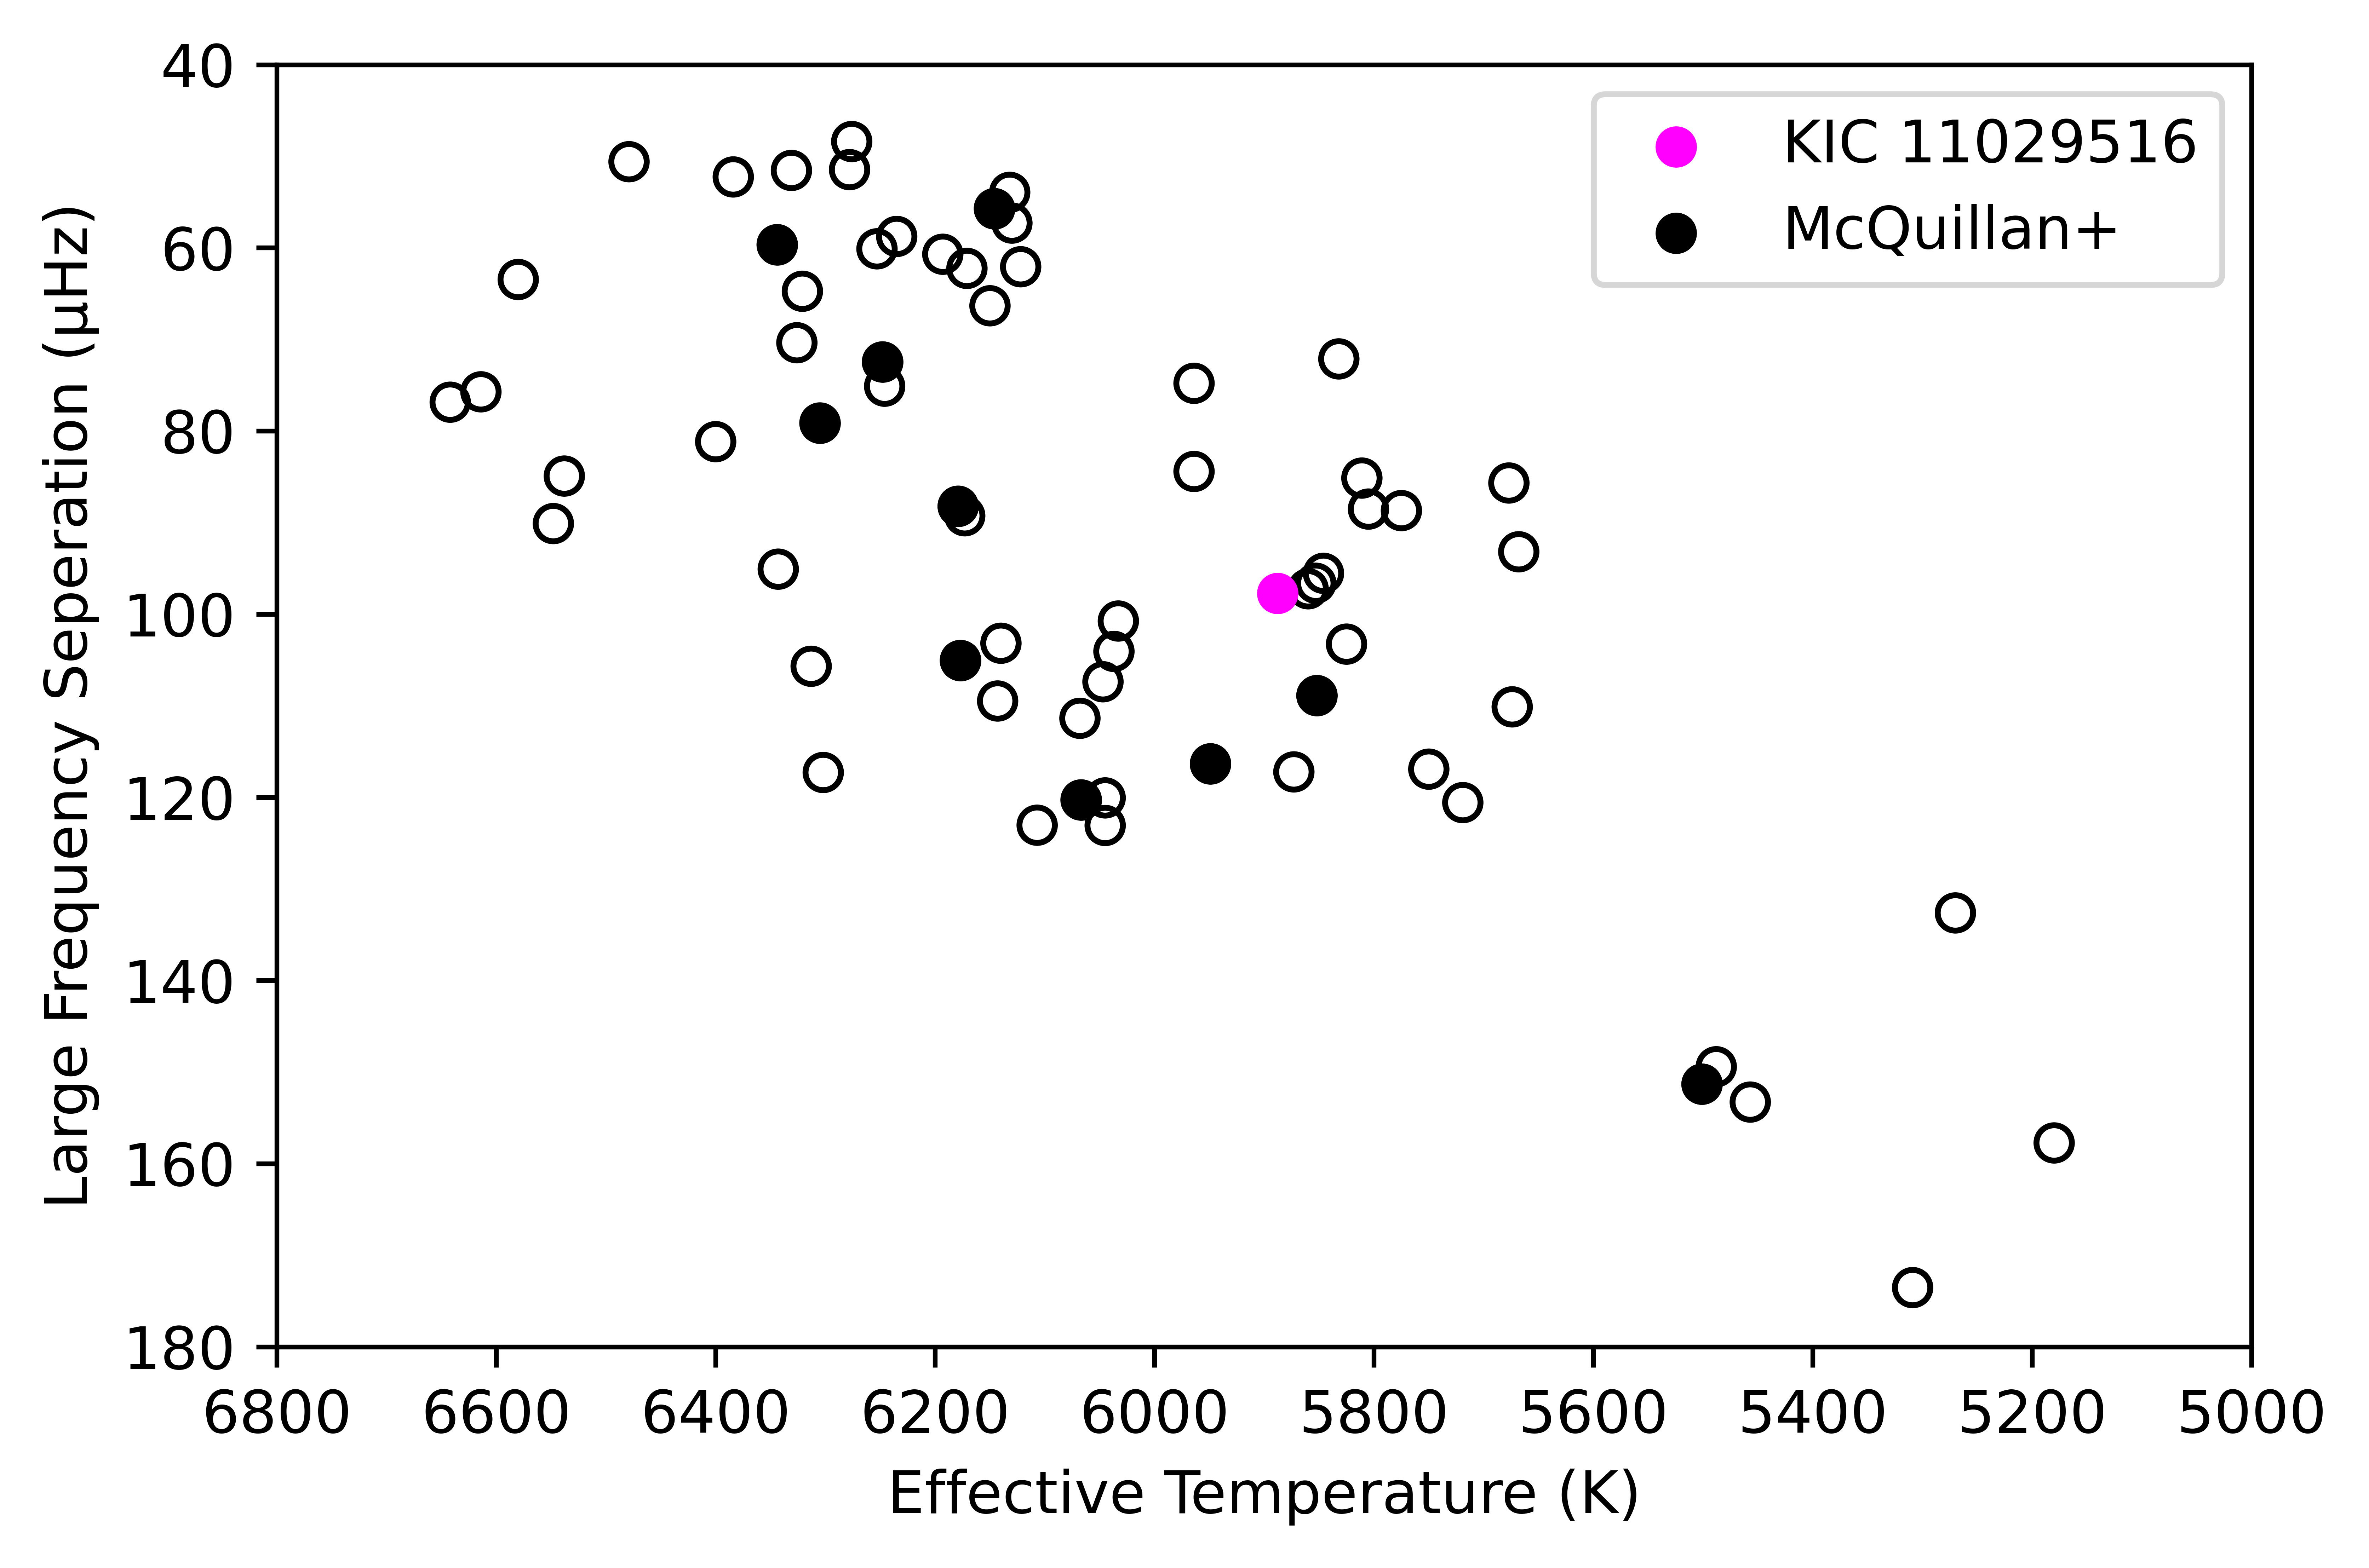

In [127]:
# from matplotlib.colors import ListedColormap

# fig = plt.figure(figsize(15,15))
agteffp = np.append(ag_teff,5888)
agdnup = np.append(ag_dnu,97.73)
agfehp = np.append(ag_feh,0.3)
# print(teffp)
# print(dnup)
# print(fehp)

# plt.title('Aguirre sample & Papayu')

plt.scatter(ag_teff,ag_dnu,facecolor='none',edgecolor='black')#dodgerblue')
plt.scatter(5888,97.73,color='magenta',label='KIC 11029516')
plt.scatter(mcqag_teff,mcqag_dnu,color='black',label='McQuillan+')

plt.xlabel('Effective Temperature (K)')
plt.ylabel('Large Frequency Seperation (µHz)')

plt.xlim([6800,5000])
plt.ylim([180,40])

# l1ech = mlines.Line2D([], [], color='fuchsia', marker='.',
#                           markersize=2, label='l = 1')
#         l2ech = mlines.Line2D([], [], color='springgreen', marker='.',
#                           markersize=2, label='l = 2')
#         l0ech = mlines.Line2D([], [], color='dodgerblue', marker='.',
#                           markersize=2, label='l = 0')
# plt.legend(handles=(l1ech,l2ech,l0ech))
plt.legend(loc="upper right")

# cMap = ListedColormap(['white', 'green', 'blue','red'])
# heatmap = plt.pcolor(data, cmap=cMap)

# cbar = plt.colorbar()
# cbar.set_label('[Fe/H]')
 
# plt.axvline(x=5888)
# plt.axhline(y=97.73)



In [147]:
# solar values 
sun_teff = 5772 #K
sun_dnu = 135 #microHz
sun_age = 4.574 #Gyr
sun_prot = 25.449 # earth days
sun_rad = 1 #Rsun
sun_lum = 1 #Lsun

In [152]:

papayu_age = 4.1
papayu_mass = 1.2 #Msun
papayu_rad = 1.3 #Rsun
papayu_teff = 5888 #K
papayu_lum = (papayu_rad)**2 * (papayu_teff/sun_teff)**4 #Lsun
# print(papayu_lum)

mcqagp_prot = np.append(mcqag_prot,papayu_prot)
mcqagp_age = np.append(mcqagage_age,papayu_age)
mcqagp_teff = np.append(mcqag_teff,papayu_teff)


Reading in: /Users/vanshree/asterosei/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00080M.track.eep
Reading in: /Users/vanshree/asterosei/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00090M.track.eep
Reading in: /Users/vanshree/asterosei/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep
Reading in: /Users/vanshree/asterosei/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00110M.track.eep
Reading in: /Users/vanshree/asterosei/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00120M.track.eep
Reading in: /Users/vanshree/asterosei/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00130M.track.eep
Reading in: /Users/vanshree/asterosei/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00140M.track.eep
['star_age', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'log_L', 'log_L_div_Ledd', 'log_LH', 'log_LHe', 'log_LZ', 'log_Teff', 'log_abs_Lgrav', 'log_R', 'log_g', 'log_surf_z', 'surf_avg_omega', 'surf_avg_v_rot', 'surf_num_c12_div_num_o16', 'v_wind_Km_per_s', 'surf_avg_omega_crit

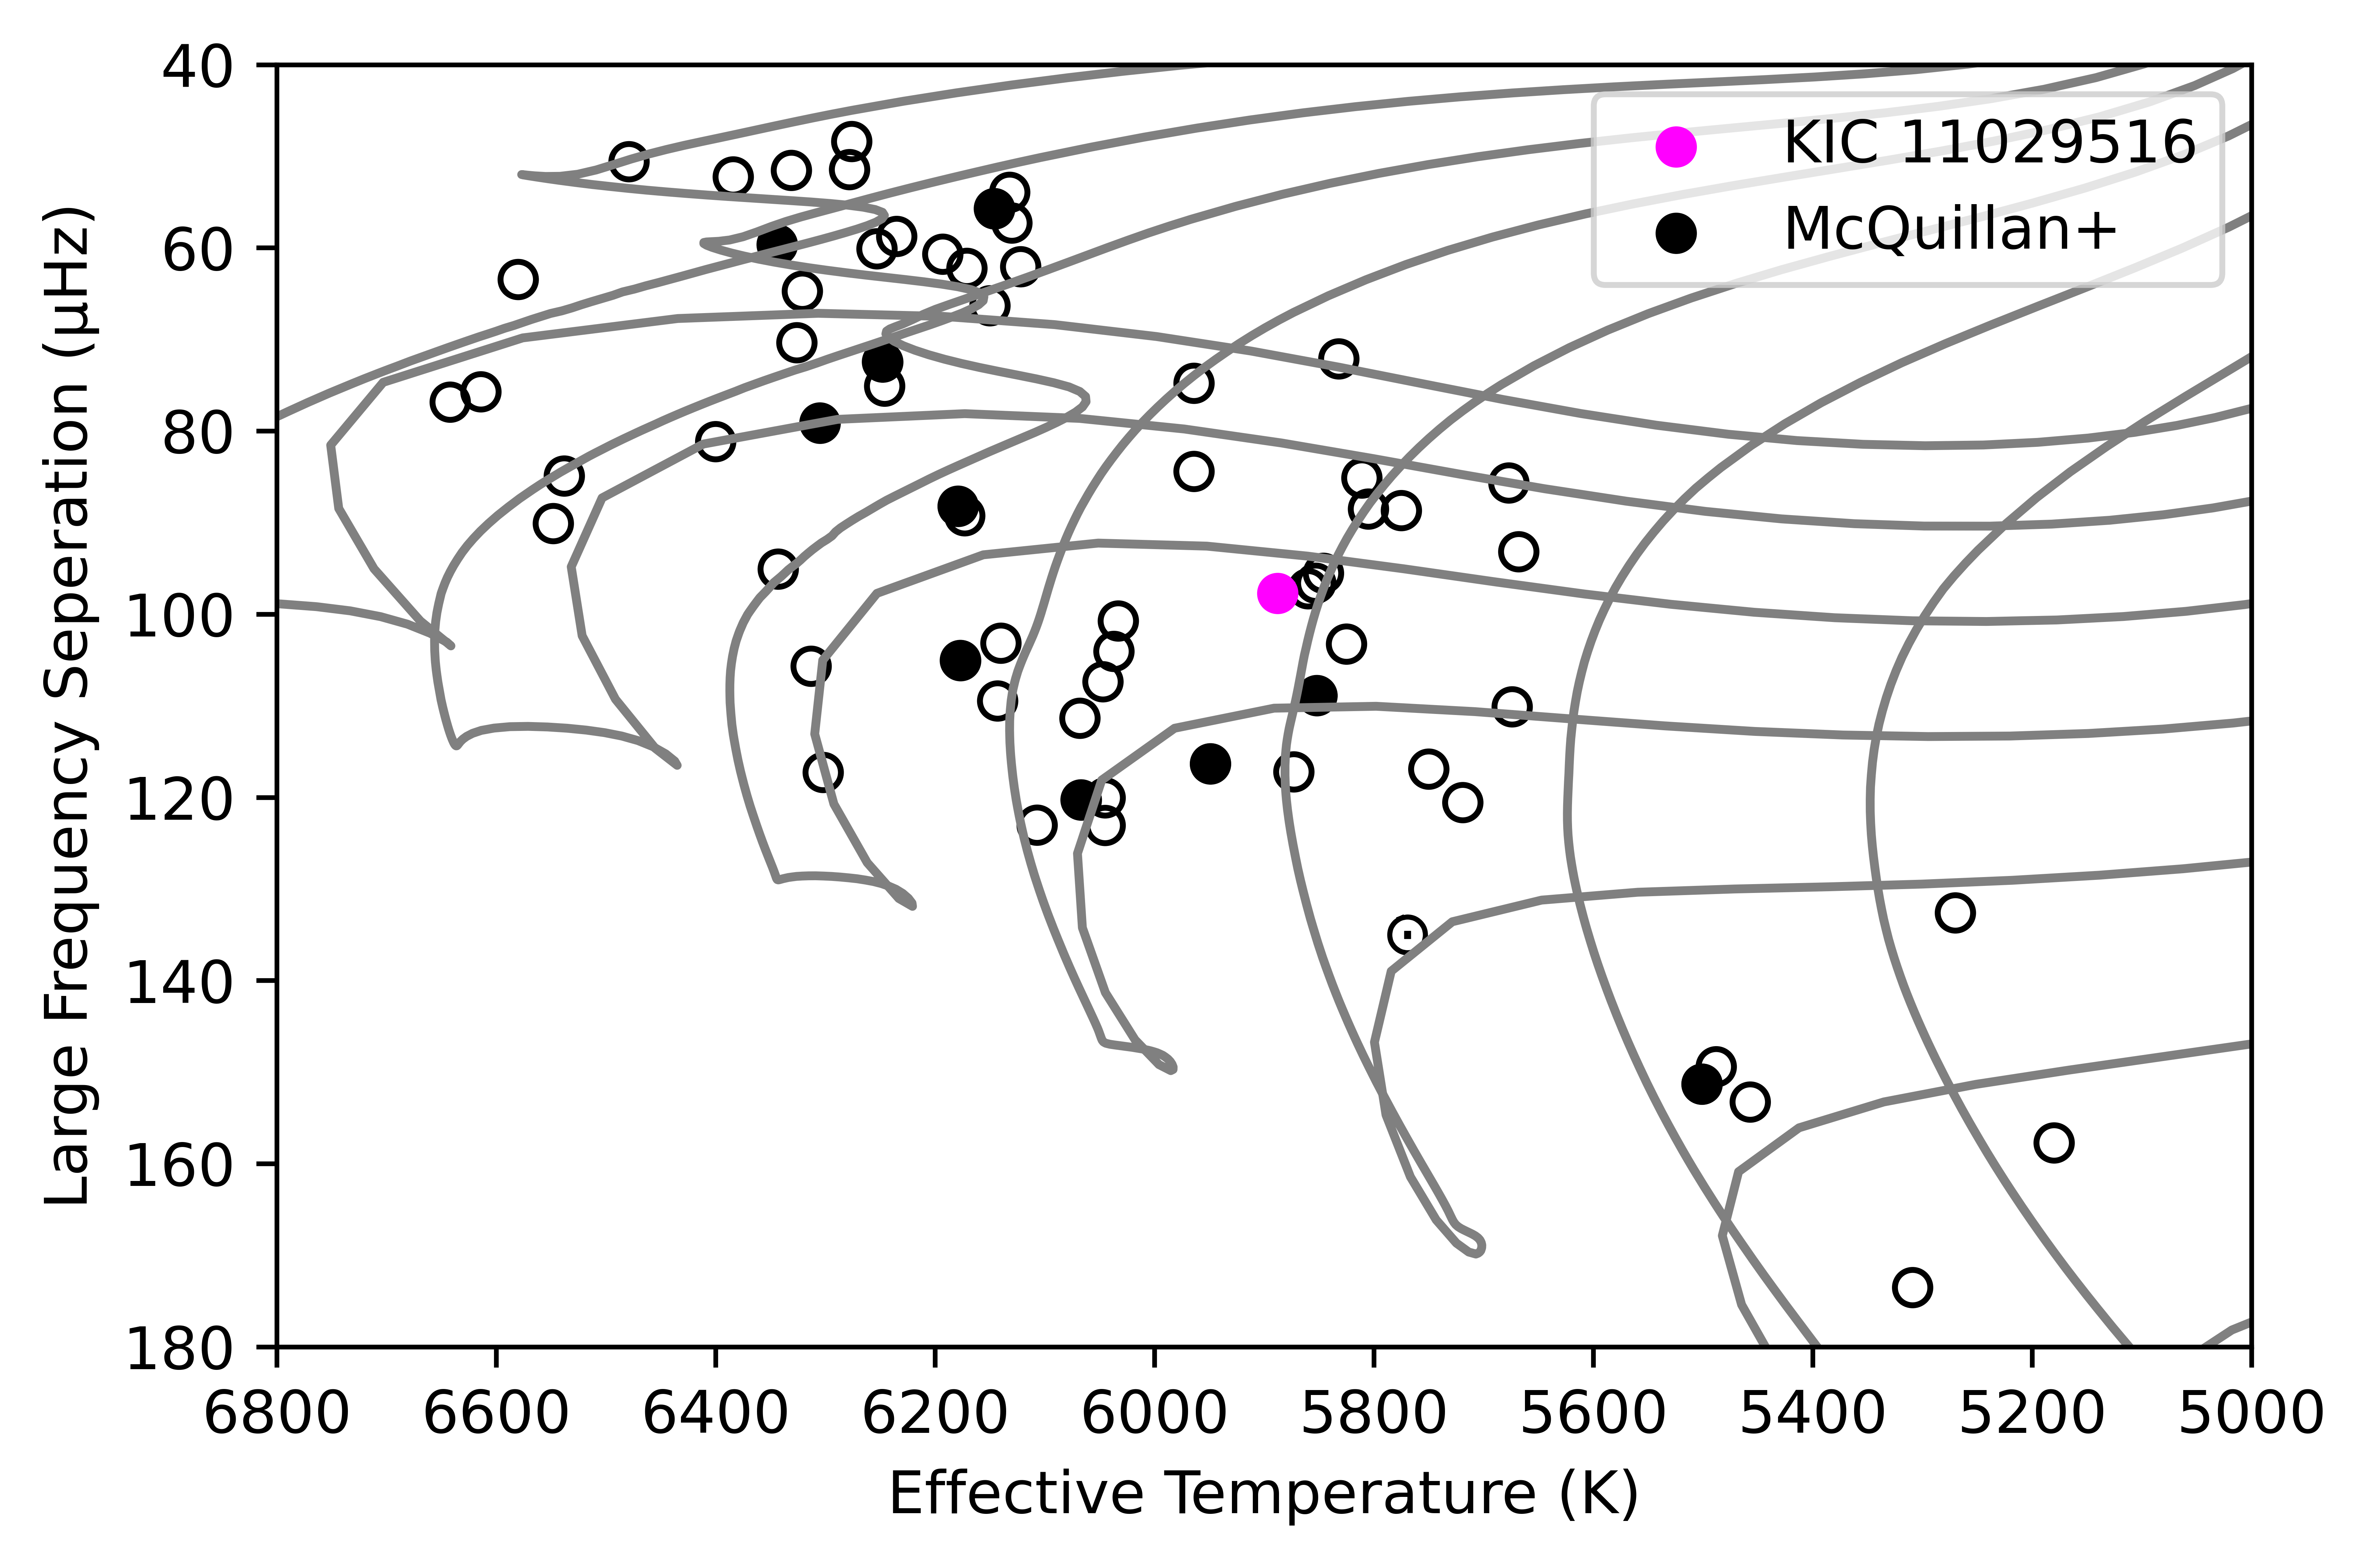

In [153]:
# model grid v.vrit 0.0
# eepXX <-- XX is mass
eep08 = read_mist_models.EEP('/Users/vanshree/asterosei/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00080M.track.eep')
eep09 = read_mist_models.EEP('/Users/vanshree/asterosei/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00090M.track.eep')
eep10 = read_mist_models.EEP('/Users/vanshree/asterosei/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep')
eep11 = read_mist_models.EEP('/Users/vanshree/asterosei/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00110M.track.eep')
eep12 = read_mist_models.EEP('/Users/vanshree/asterosei/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00120M.track.eep')
eep13 = read_mist_models.EEP('/Users/vanshree/asterosei/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00130M.track.eep')
eep14 = read_mist_models.EEP('/Users/vanshree/asterosei/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00140M.track.eep')

## what quantities can you pull out from an eep?
print(eep08.hdr_list)

mist_teff08 = 10**eep08.eeps['log_Teff']
mist_rad08 = 10**eep08.eeps['log_R']
mist_lum08 = 10**eep08.eeps['log_L']
mist_dnu08 = eep08.eeps['delta_nu']
mist_phase = eep08.eeps['phase']

# for value in enumerate(mist_phase):
#     if value==0 :
#         print(mist_phase)


mist_teff09 = 10**eep09.eeps['log_Teff']
mist_rad09 = 10**eep09.eeps['log_R']
mist_lum09 = 10**eep09.eeps['log_L']
mist_dnu09 = eep09.eeps['delta_nu']

mist_teff10 = 10**eep10.eeps['log_Teff']
mist_rad10 = 10**eep10.eeps['log_R']
mist_lum10 = 10**eep10.eeps['log_L']
mist_dnu10 = eep10.eeps['delta_nu']

mist_teff11 = 10**eep11.eeps['log_Teff']
mist_rad11 = 10**eep11.eeps['log_R']
mist_lum11 = 10**eep11.eeps['log_L']
mist_dnu11 = eep11.eeps['delta_nu']

mist_teff12 = 10**eep12.eeps['log_Teff']
mist_rad12 = 10**eep12.eeps['log_R']
mist_lum12 = 10**eep12.eeps['log_L']
mist_dnu12 = eep12.eeps['delta_nu']

mist_teff13 = 10**eep13.eeps['log_Teff']
mist_rad13 = 10**eep13.eeps['log_R']
mist_lum13 = 10**eep13.eeps['log_L']
mist_dnu13 = eep13.eeps['delta_nu']

mist_teff14 = 10**eep14.eeps['log_Teff']
mist_rad14 = 10**eep14.eeps['log_R']
mist_lum14 = 10**eep14.eeps['log_L']
mist_dnu14 = eep14.eeps['delta_nu']

# print('version: ', eep.version)
# print('abundances: ', eep.abun)
# print('rotation: ', eep.rot)
# print('initial mass: ', eep.minit)
# print('available columns: ', eep.hdr_list)

plt.scatter(ag_teff,ag_dnu,facecolor='none',edgecolor='black')#dodgerblue')
plt.scatter(5888,97.73,color='magenta',label='KIC 11029516')
plt.scatter(mcqag_teff,mcqag_dnu,color='black',label='McQuillan+')
plt.scatter(sun_teff,sun_dnu,marker='$\odot$',color='black',s=60,linewidths=0.1)


plt.plot(mist_teff08,mist_dnu08,color='Gray')
plt.plot(mist_teff09,mist_dnu09,color='Gray')
plt.plot(mist_teff10,mist_dnu10,color='Gray')
plt.plot(mist_teff11,mist_dnu11,color='Gray')
plt.plot(mist_teff12,mist_dnu12,color='Gray')
plt.plot(mist_teff13,mist_dnu13,color='Gray')
plt.plot(mist_teff14,mist_dnu14,color='Gray')

plt.xlabel('Effective Temperature (K)')
plt.ylabel('Large Frequency Seperation (µHz)')
plt.xlim([6800,5000])
plt.ylim([180,40])
plt.legend(loc="upper right")


#eep.plot_HR(color='Black', phases=[0, 6], phasecolor=['Red', 'Blue'])



In [154]:
def plot_HRnew(self, fignum=0, phases=[], phasecolor=[], **kwargs):
        
        """
        Plots the HR diagram.
        Args:
            None.
            
        Keywords:
            accepts matplotlib keywords: color, linestyle, linewidth, etc.
            keyword: fignum, phase*, phasecolor
            
            * Following the FSPS notation,
            * PMS:-1 ; MS:0 ; SGB+RGB:2 ; CHeB:3 ; EAGB:4 ; TPAGB:5 ; post-AGB:6 ; WR:9
    
        Usage:
            >> eep.plot_HR(fignum=3)
            >> eep.plot_HR(phase=[0, 2], phasecolor=['Gray', 'Blue']) #highlight the MS and RGB phases in gray and blue.
        
        """
        
        x = 10**self.eeps['log_Teff']
        y = 10**self.eeps['log_L']
        
        fig = plt.figure(fignum)
        plt.xlabel('Effective Temperature (K)')
        plt.ylabel('Stellar Radius ($R_\odot$)')
        
        ax = fig.add_subplot(111)
        ax.plot(x, y, **kwargs)
        ax.axis([max(x)+0.2, min(x)-0.2, min(y)-0.2, max(y)+0.2])

        if len(phases) >= 0:
            if len(phases) != len(phasecolor):
                print('The length of the phase and phasecolor array must be identical.')
                return
            for i_p, phase in enumerate(phases):
                p = self.eeps['phase']
                p_ind = np.where(p == phase)
                if len(p_ind) > 0:
                    if phasecolor == '':
                        ax.plot(x[p_ind], y[p_ind], linewidth=1.0, alpha=0.5)
                    else:
                        ax.plot(x[p_ind], y[p_ind], color=phasecolor[i_p], linewidth=2.0, alpha=0.5)


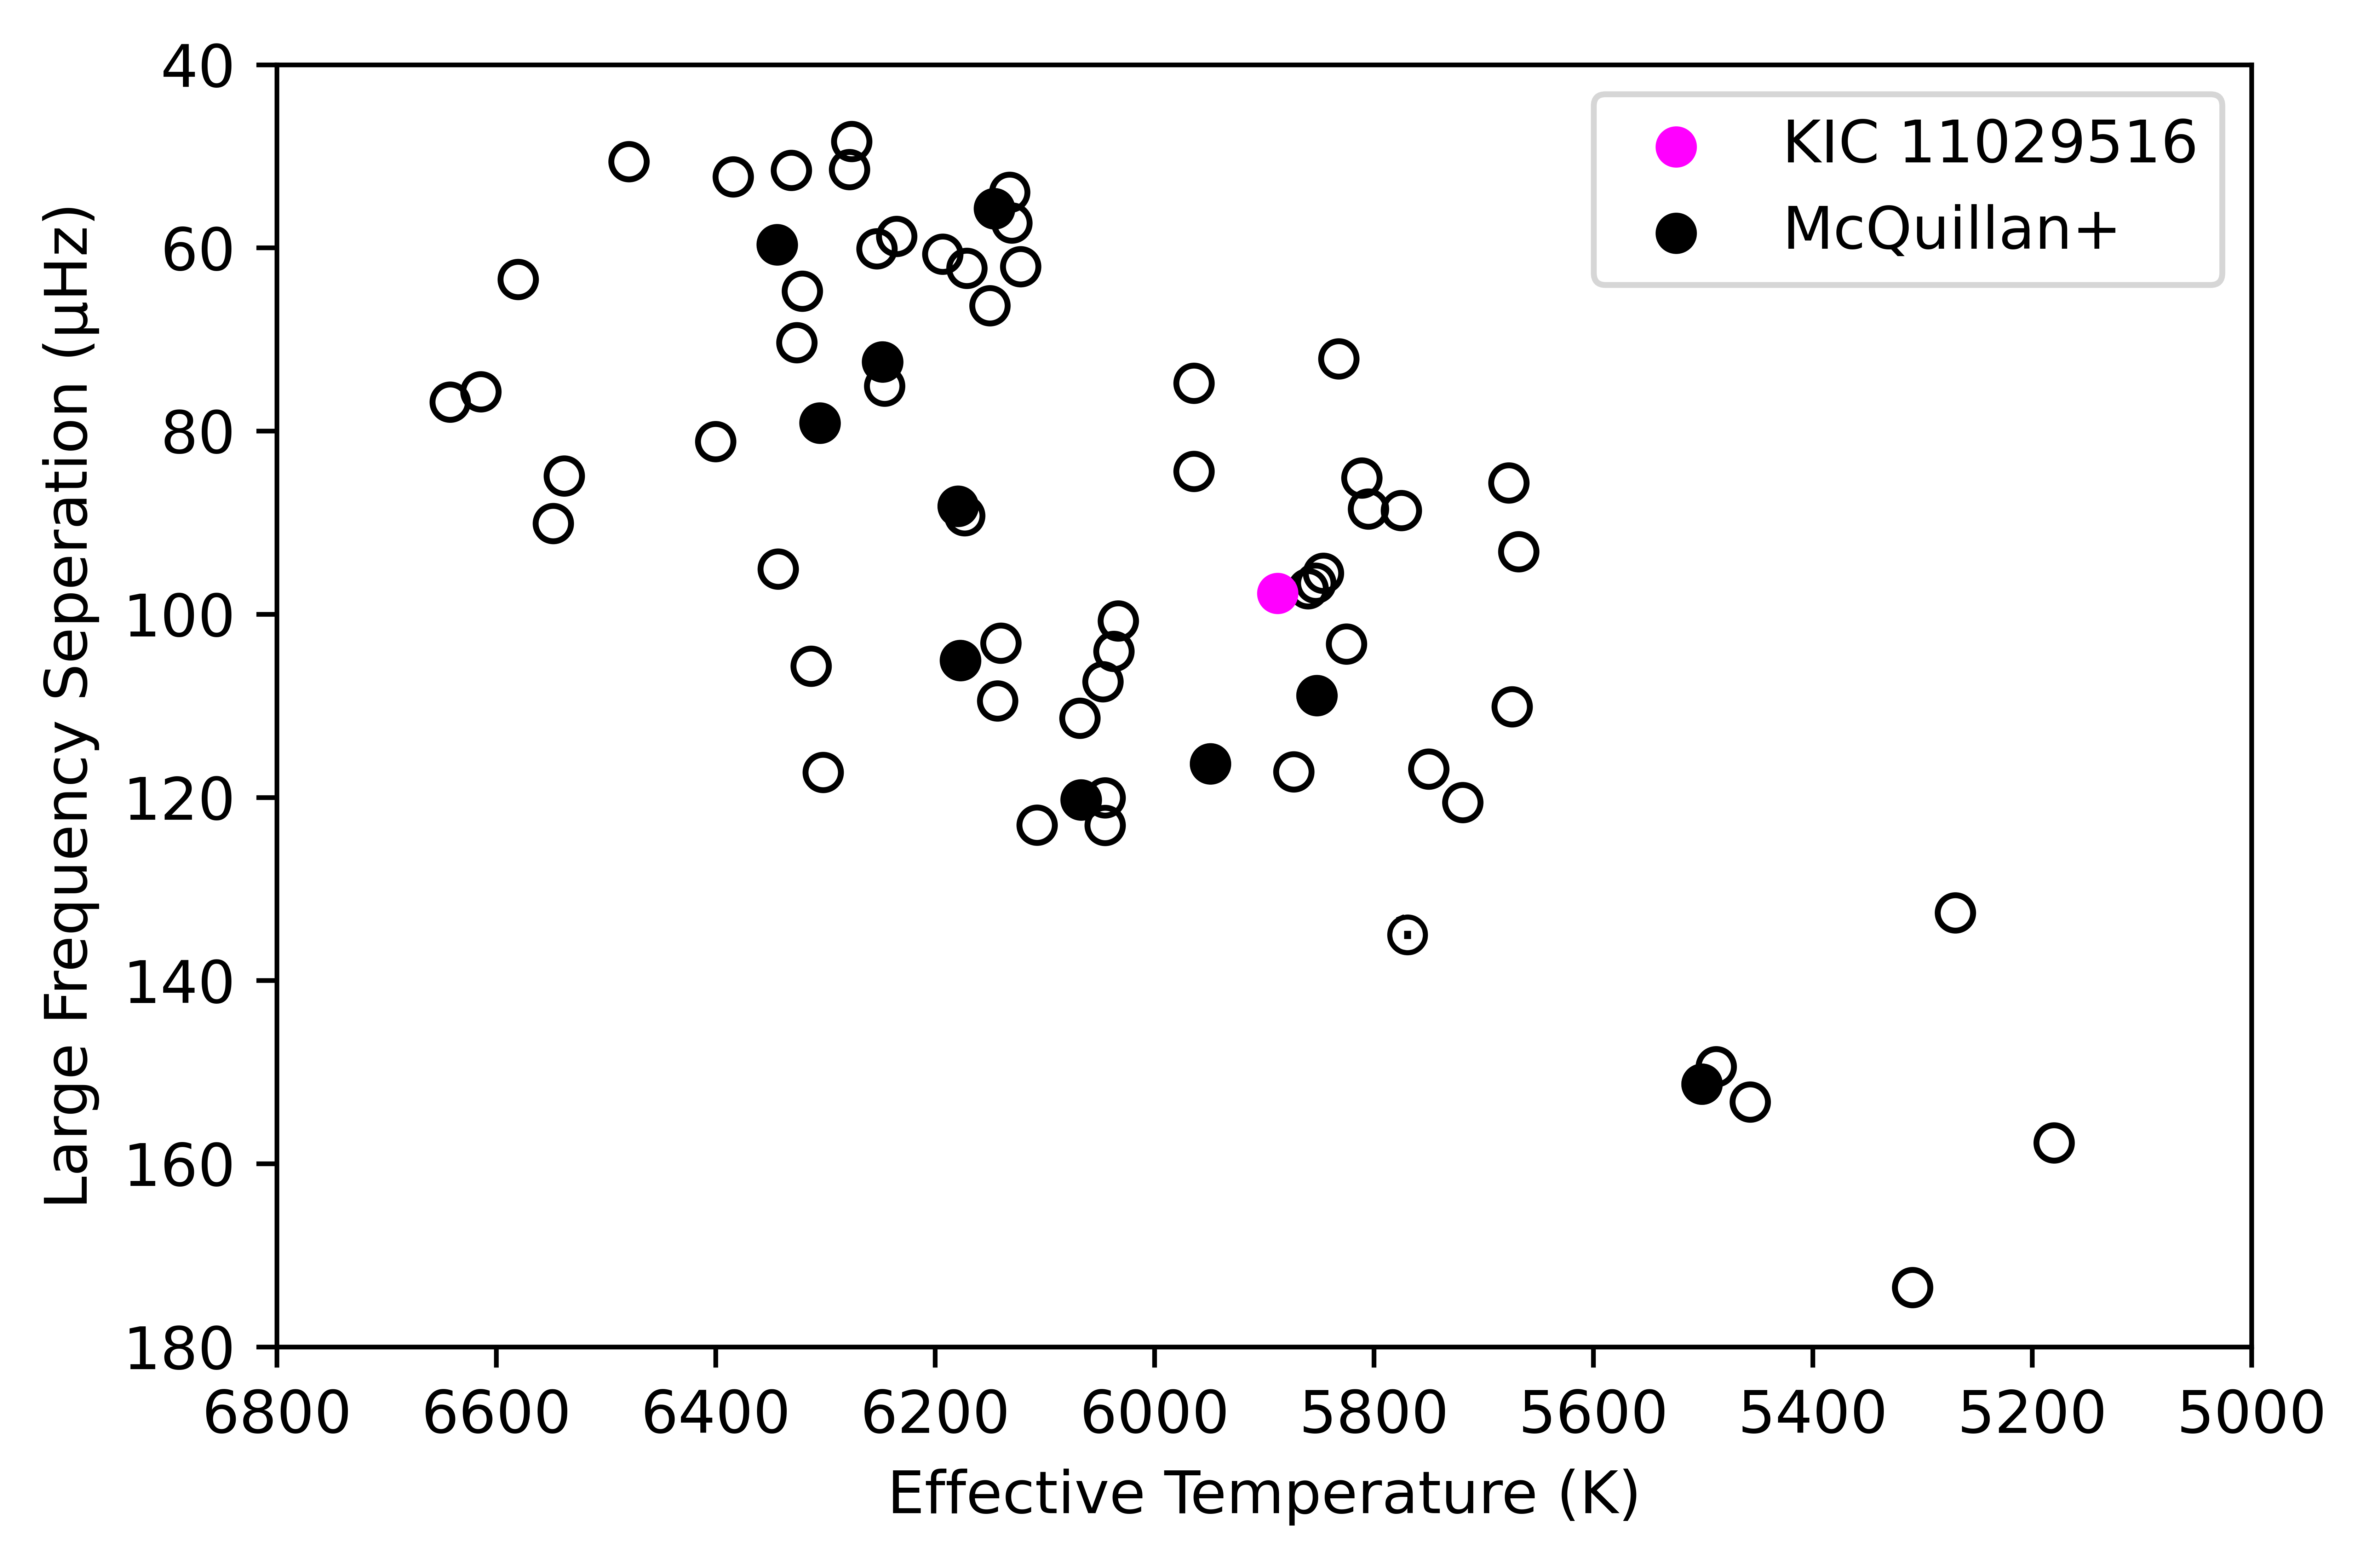

In [155]:
plot_HRnew(eep08,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep09,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep10,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep11,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep12,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep13,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep14,alpha=0, phases=[0], phasecolor=['Gray'])

plt.scatter(ag_teff,ag_dnu,facecolor='none',edgecolor='black')#dodgerblue')
plt.scatter(5888,97.73,color='magenta',label='KIC 11029516')
plt.scatter(mcqag_teff,mcqag_dnu,color='black',label='McQuillan+')
plt.scatter(sun_teff,sun_dnu,marker='$\odot$',color='black',s=60,linewidths=0.1)


plt.xlabel('Effective Temperature (K)')
plt.ylabel('Large Frequency Seperation (µHz)')
plt.xlim([6800,5000])
plt.ylim([180,40])
plt.legend(loc="upper right")

In [156]:
# model grid v.vrit 0.0

In [157]:
## og just testing

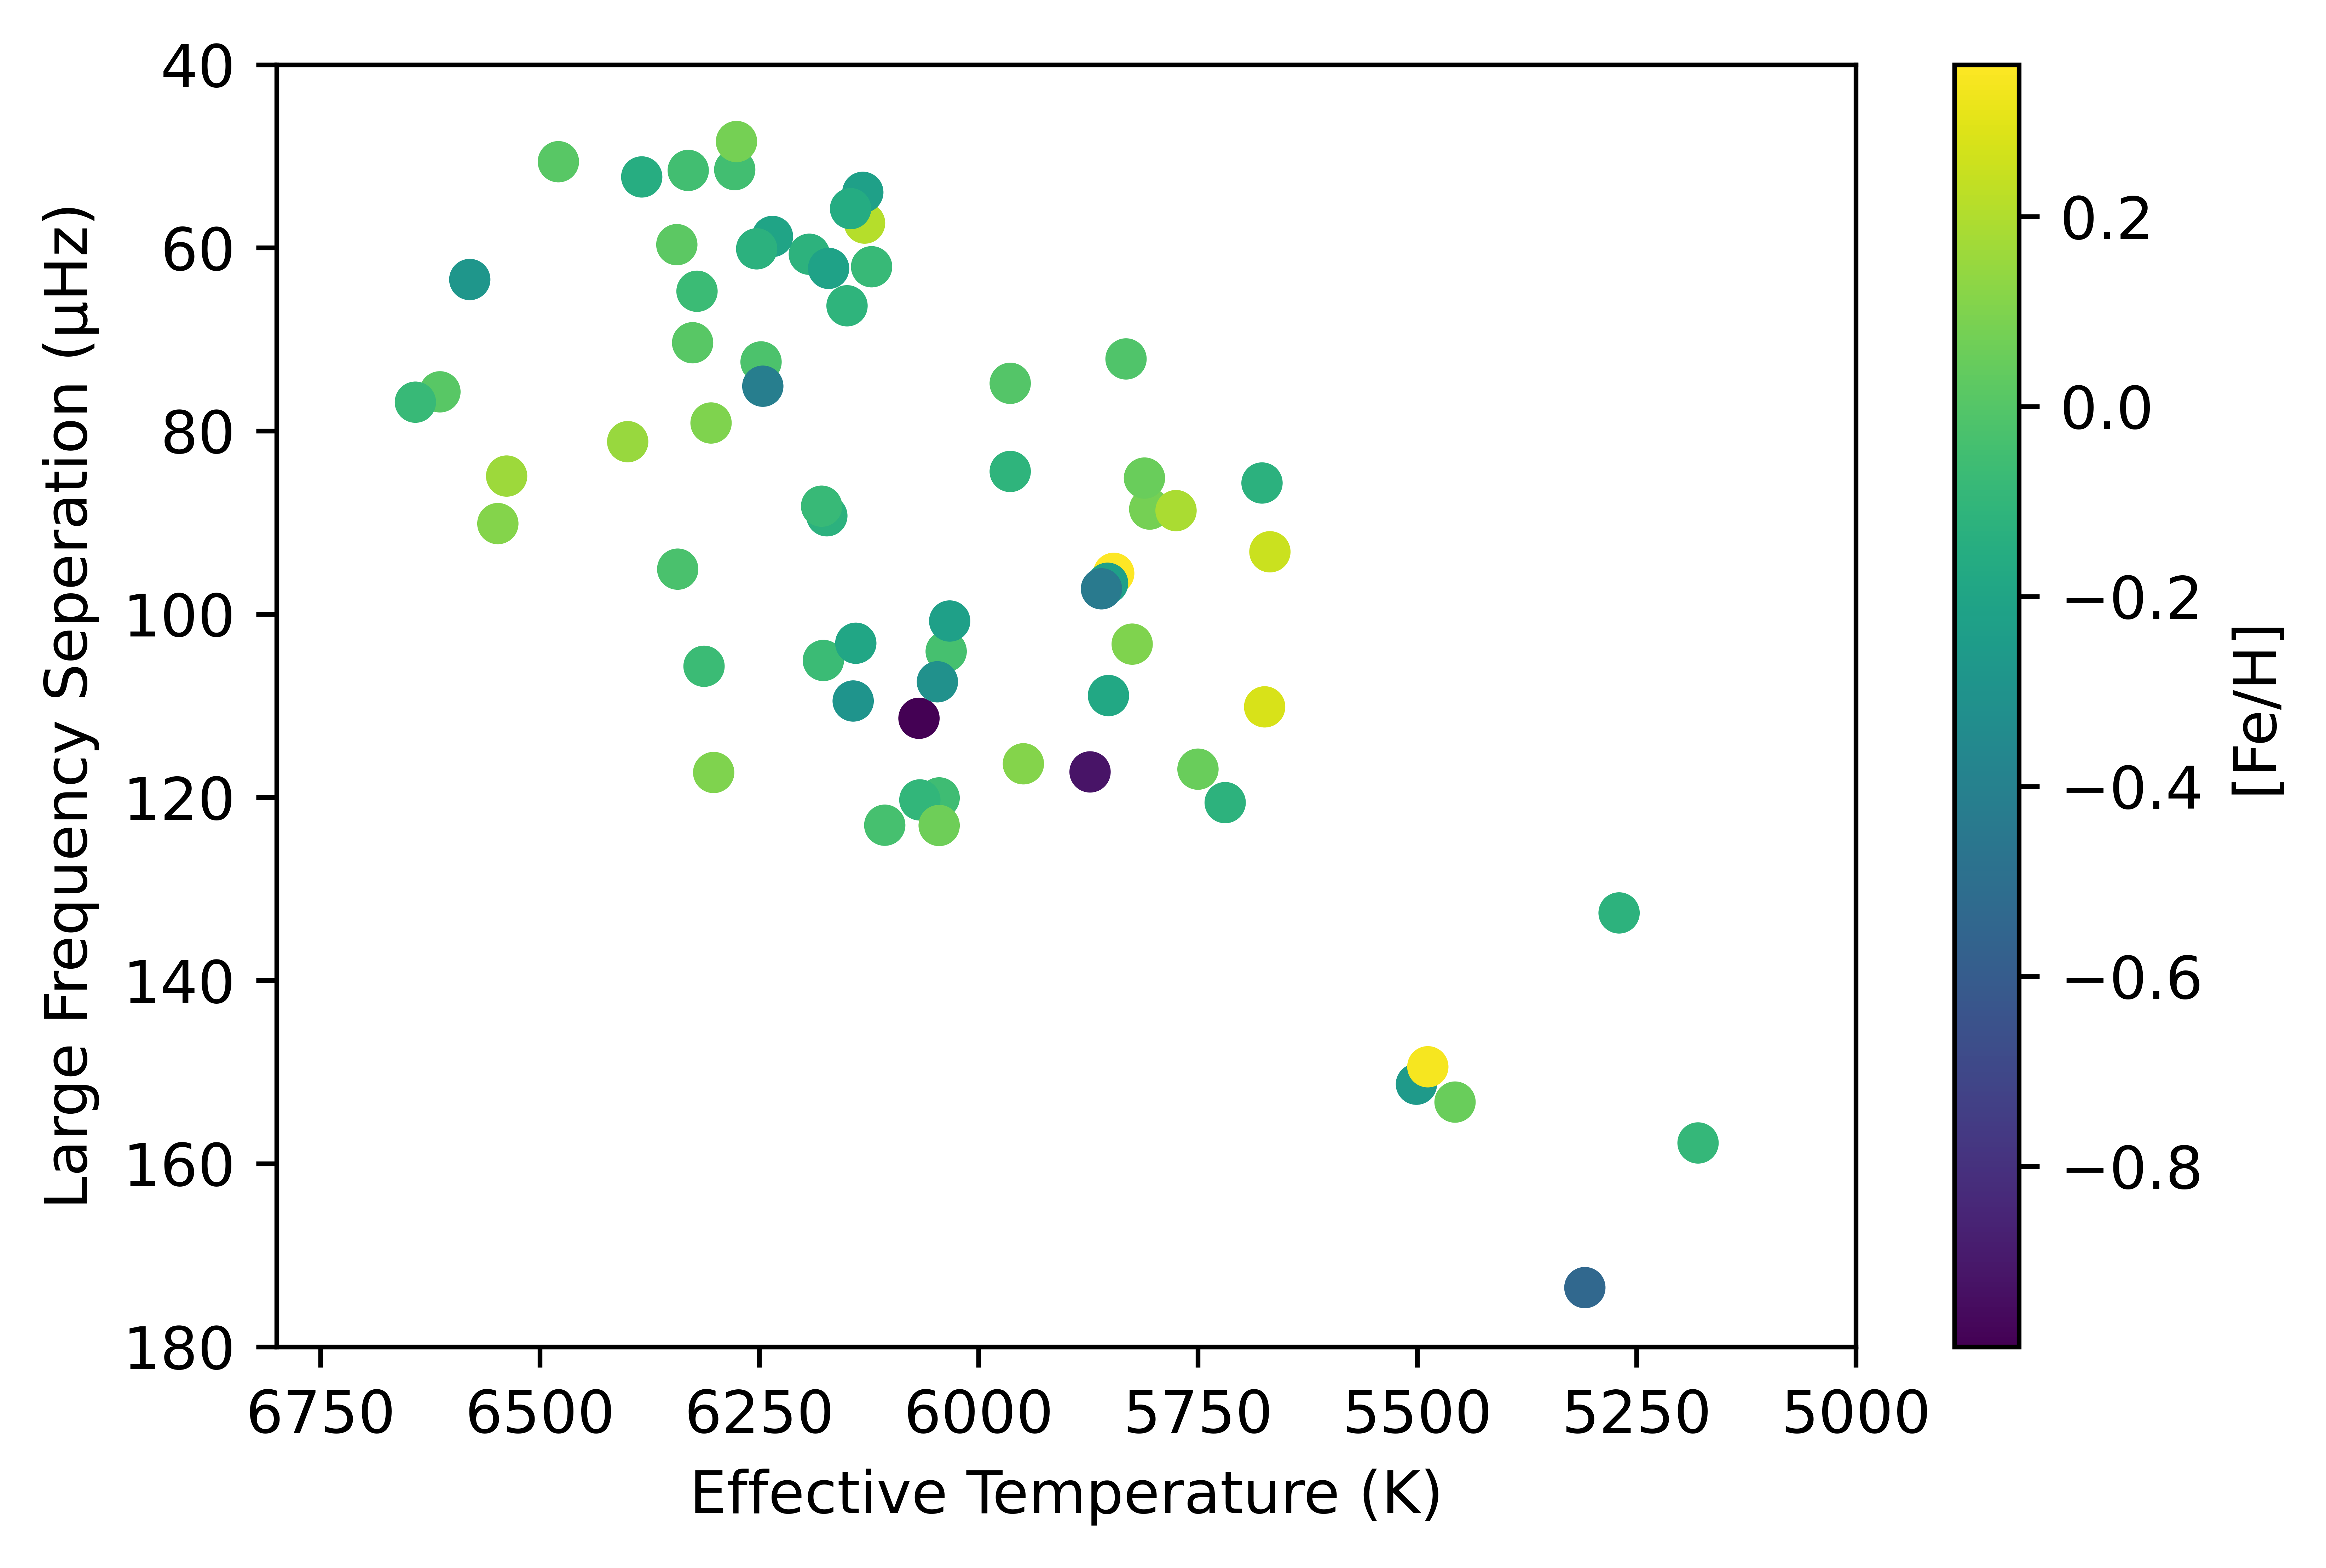

In [158]:
# plt.title('Aguirre sample') # recreating to make sure it matches the paper

plot_HRnew(eep08,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep09,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep10,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep11,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep12,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep13,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep14,alpha=0, phases=[0], phasecolor=['Gray'])

plt.scatter(ag_teff,ag_dnu,c=ag_feh)
# plt.scatter(sun_teff,sun_dnu,marker='$\odot$',c='black',s=60,linewidths=0.1)


plt.xlabel('Effective Temperature (K)')
plt.ylabel('Large Frequency Seperation (µHz)')
plt.xlim([6800,5000])
plt.ylim([180,40])
cbar = plt.colorbar()
cbar.set_label('[Fe/H]')

[ 0.01  0.01 -0.06 -0.15 -0.12  0.25 -0.04  0.08  0.36  0.21 -0.23 -0.04
 -0.23 -0.07 -0.05  0.28  0.01 -0.01  0.02 -0.99  0.1   0.19 -0.21  0.05
 -0.02 -0.26 -0.2  -0.54  0.34 -0.13 -0.03 -0.08 -0.1  -0.29 -0.12 -0.42
 -0.92 -0.13 -0.12 -0.18  0.1   0.15  0.16 -0.05 -0.31 -0.13 -0.07  0.05
 -0.44 -0.23  0.11 -0.16 -0.07 -0.11  0.06 -0.11 -0.19  0.11 -0.08 -0.09
 -0.08  0.08  0.1   0.05  0.   -0.28  0.3 ]


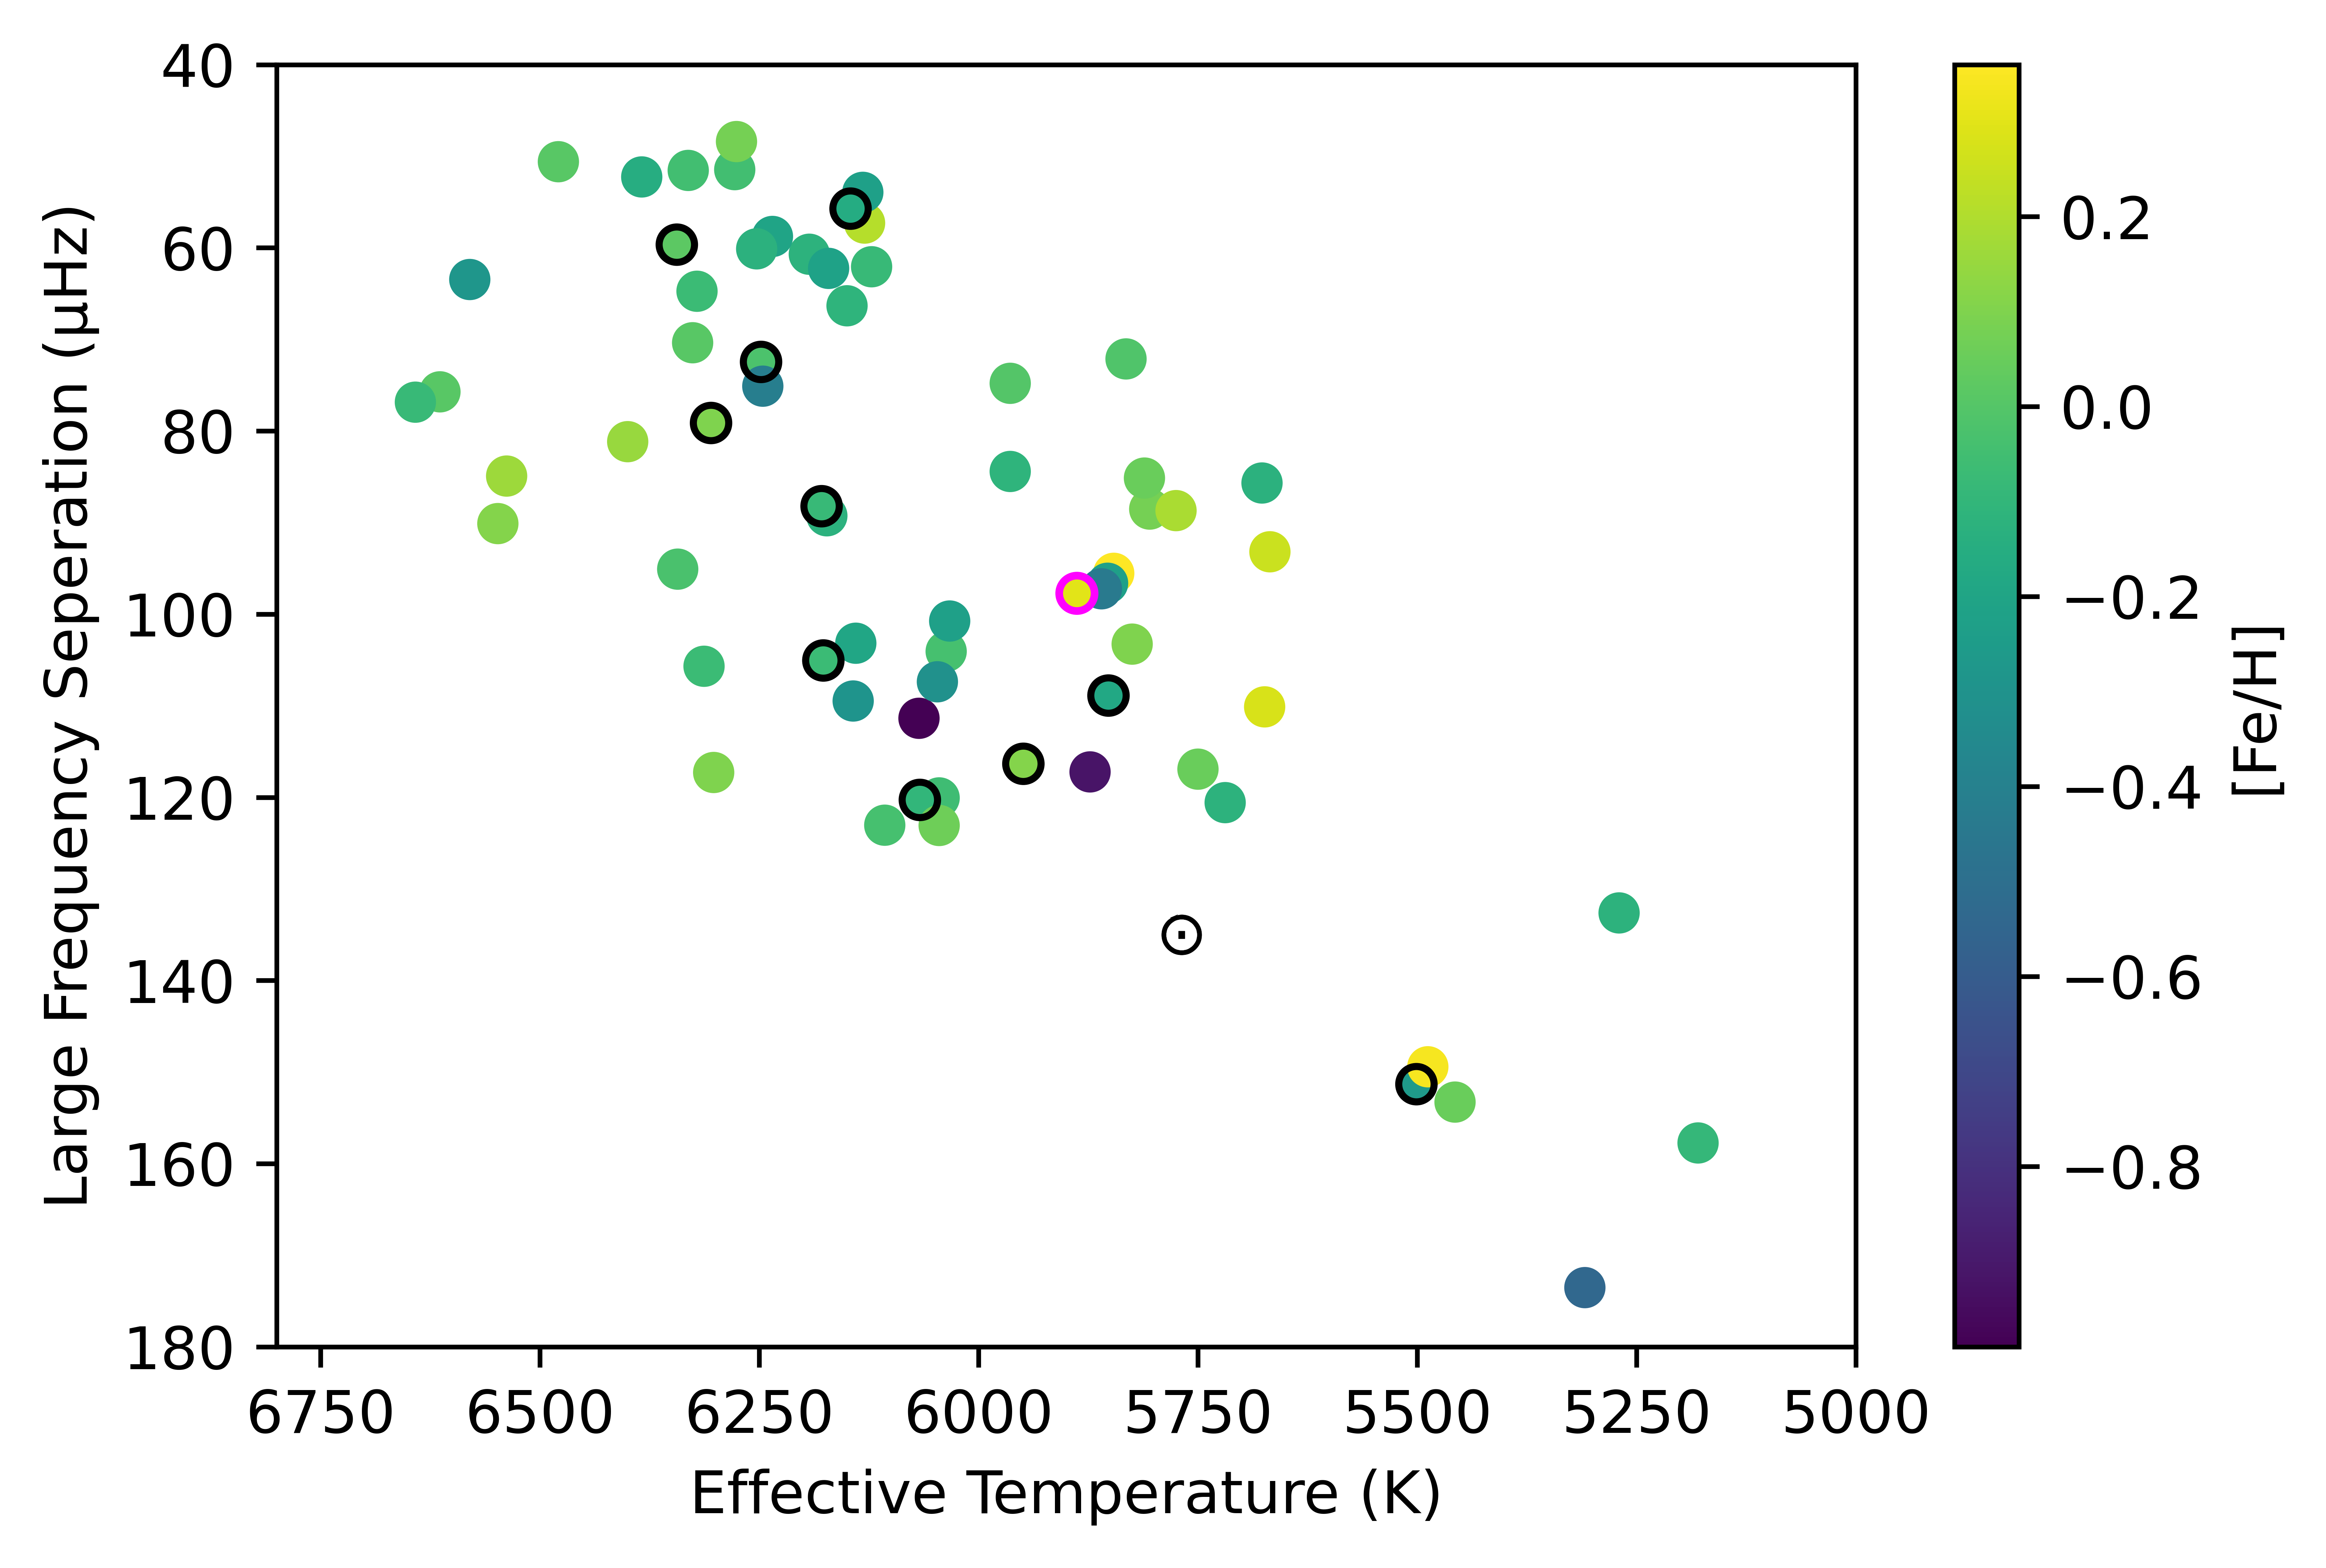

In [159]:
agteffp = np.append(ag_teff,5888)
agdnup = np.append(ag_dnu,97.73)
agfehp = np.append(ag_feh,0.3)

plot_HRnew(eep08,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep09,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep10,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep11,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep12,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep13,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep14,alpha=0, phases=[0], phasecolor=['Gray'])


# print(teffp)
# print(dnup)
# print(fehp)
# plt.title('Aguirre sample & Papayu')

print(agfehp)

plt.scatter(5888,97.73,marker='o',facecolor='None',edgecolor='magenta',linewidths=1.3)
plt.scatter(mcqag_teff,mcqag_dnu,marker='o',facecolor='None',edgecolor='black',linewidths=1.2,label='McQuillan+')
plt.scatter(sun_teff,sun_dnu,marker='$\odot$',color='black',s=60,linewidths=0.05)

plt.scatter(agteffp,agdnup,c=agfehp,zorder=0)

plt.xlabel('Effective Temperature (K)')
plt.ylabel('Large Frequency Seperation (µHz)')
plt.xlim([6800,5000])
plt.ylim([180,40])

cbar = plt.colorbar()
cbar.set_label('[Fe/H]')
# plt.axvline(x=5888)
# plt.axhline(y=97.73)

[1.9444, 1.5635, 1.6535, 0.8707, 1.1197, 1.1377, 1.1466, 2.0373, 1.2456, 1.4016]
[6344.0, 6305.0, 6248.0, 5501.0, 6067.0, 5852.0, 5949.0, 6146.0, 6177.0, 6179.0]


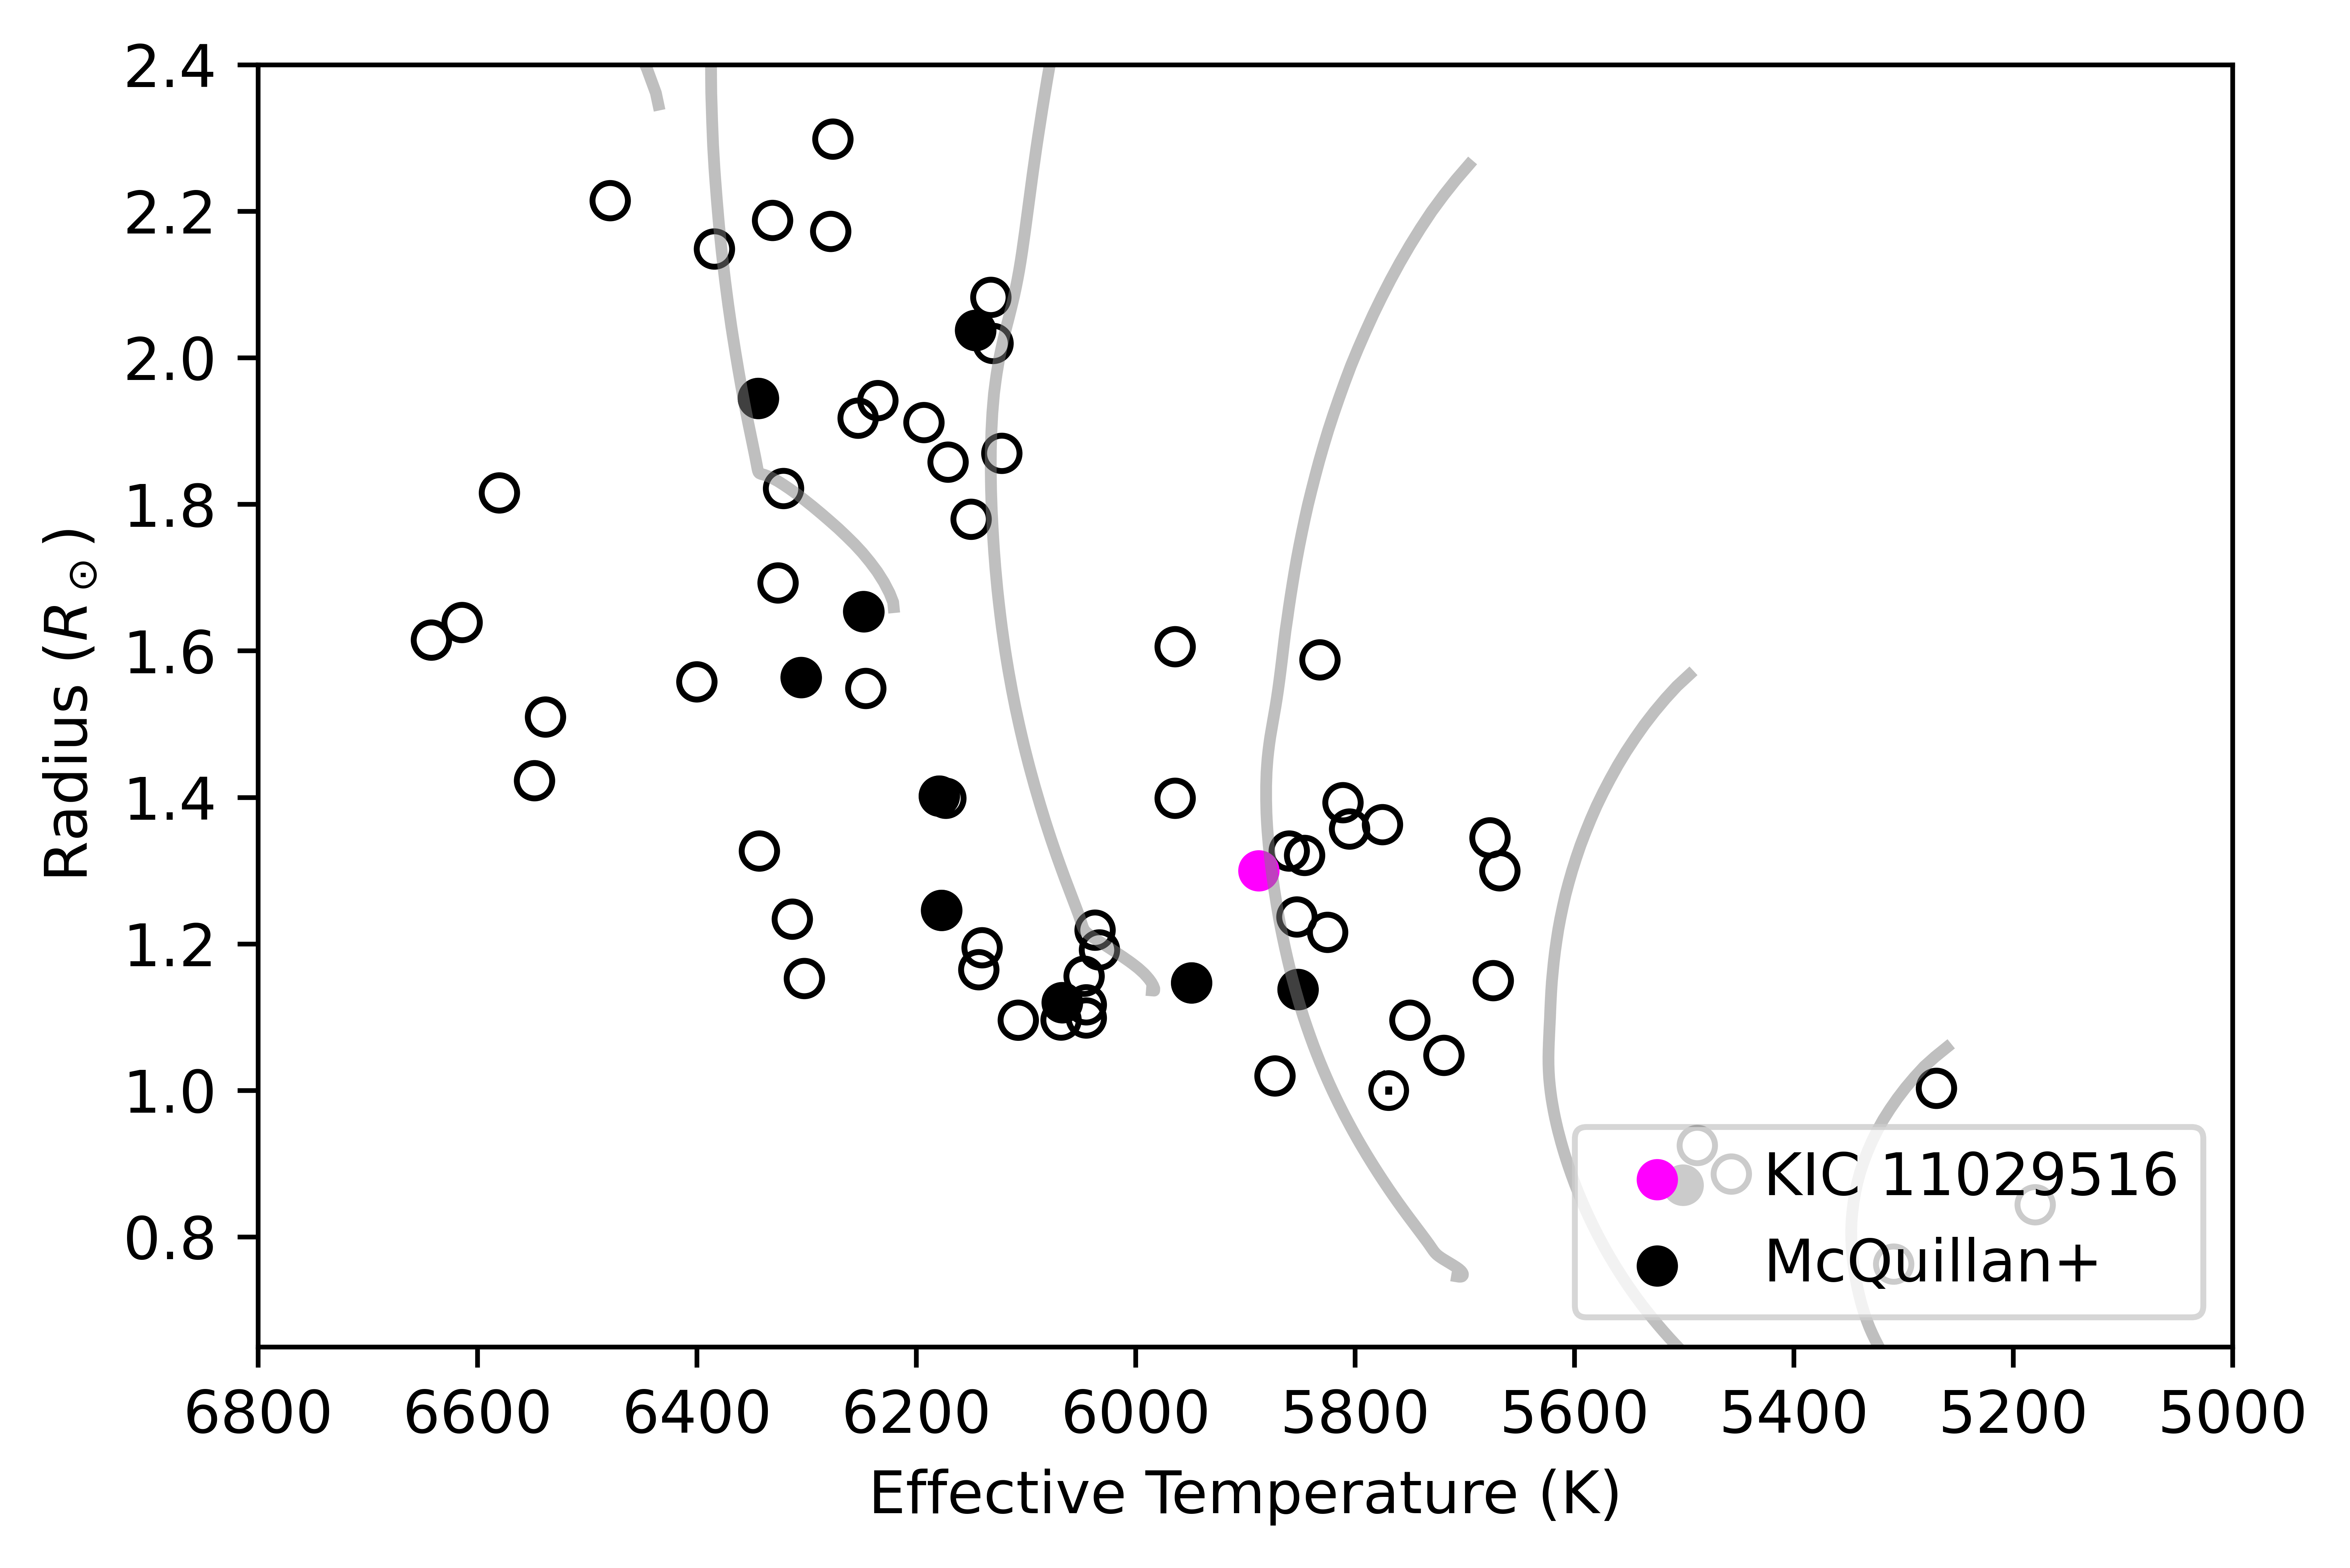

In [160]:
plot_HRnew(eep08,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep09,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep10,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep11,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep12,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep13,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep14,alpha=0, phases=[0], phasecolor=['Gray'])

plt.scatter(ag_teff,ag_rad,facecolor='none',edgecolor='black')#dodgerblue')
plt.scatter(papayu_teff,papayu_rad,color='magenta',label='KIC 11029516')
plt.scatter(mcqag_teff,mcqag_rad,color='black',label='McQuillan+')
plt.scatter(sun_teff,sun_rad,marker='$\odot$',color='black',s=60,linewidths=0.1)


plt.xlabel('Effective Temperature (K)')
plt.ylabel('Radius ($R_\odot$)')
plt.xlim([6800,5000])
plt.ylim([0.65,2.4])
#plt.ylim([2.4,0.65])
# plt.ylim([2.5,0.5])
#plt.ylim([180,40])

plt.legend(loc="lower right")

print(mcqag_rad)
print(mcqag_teff)

[5.511, 3.478, 3.813, 0.631, 1.624, 1.387, 1.52, 5.923, 2.148, 2.544]
[6344.0, 6305.0, 6248.0, 5501.0, 6067.0, 5852.0, 5949.0, 6146.0, 6177.0, 6179.0]


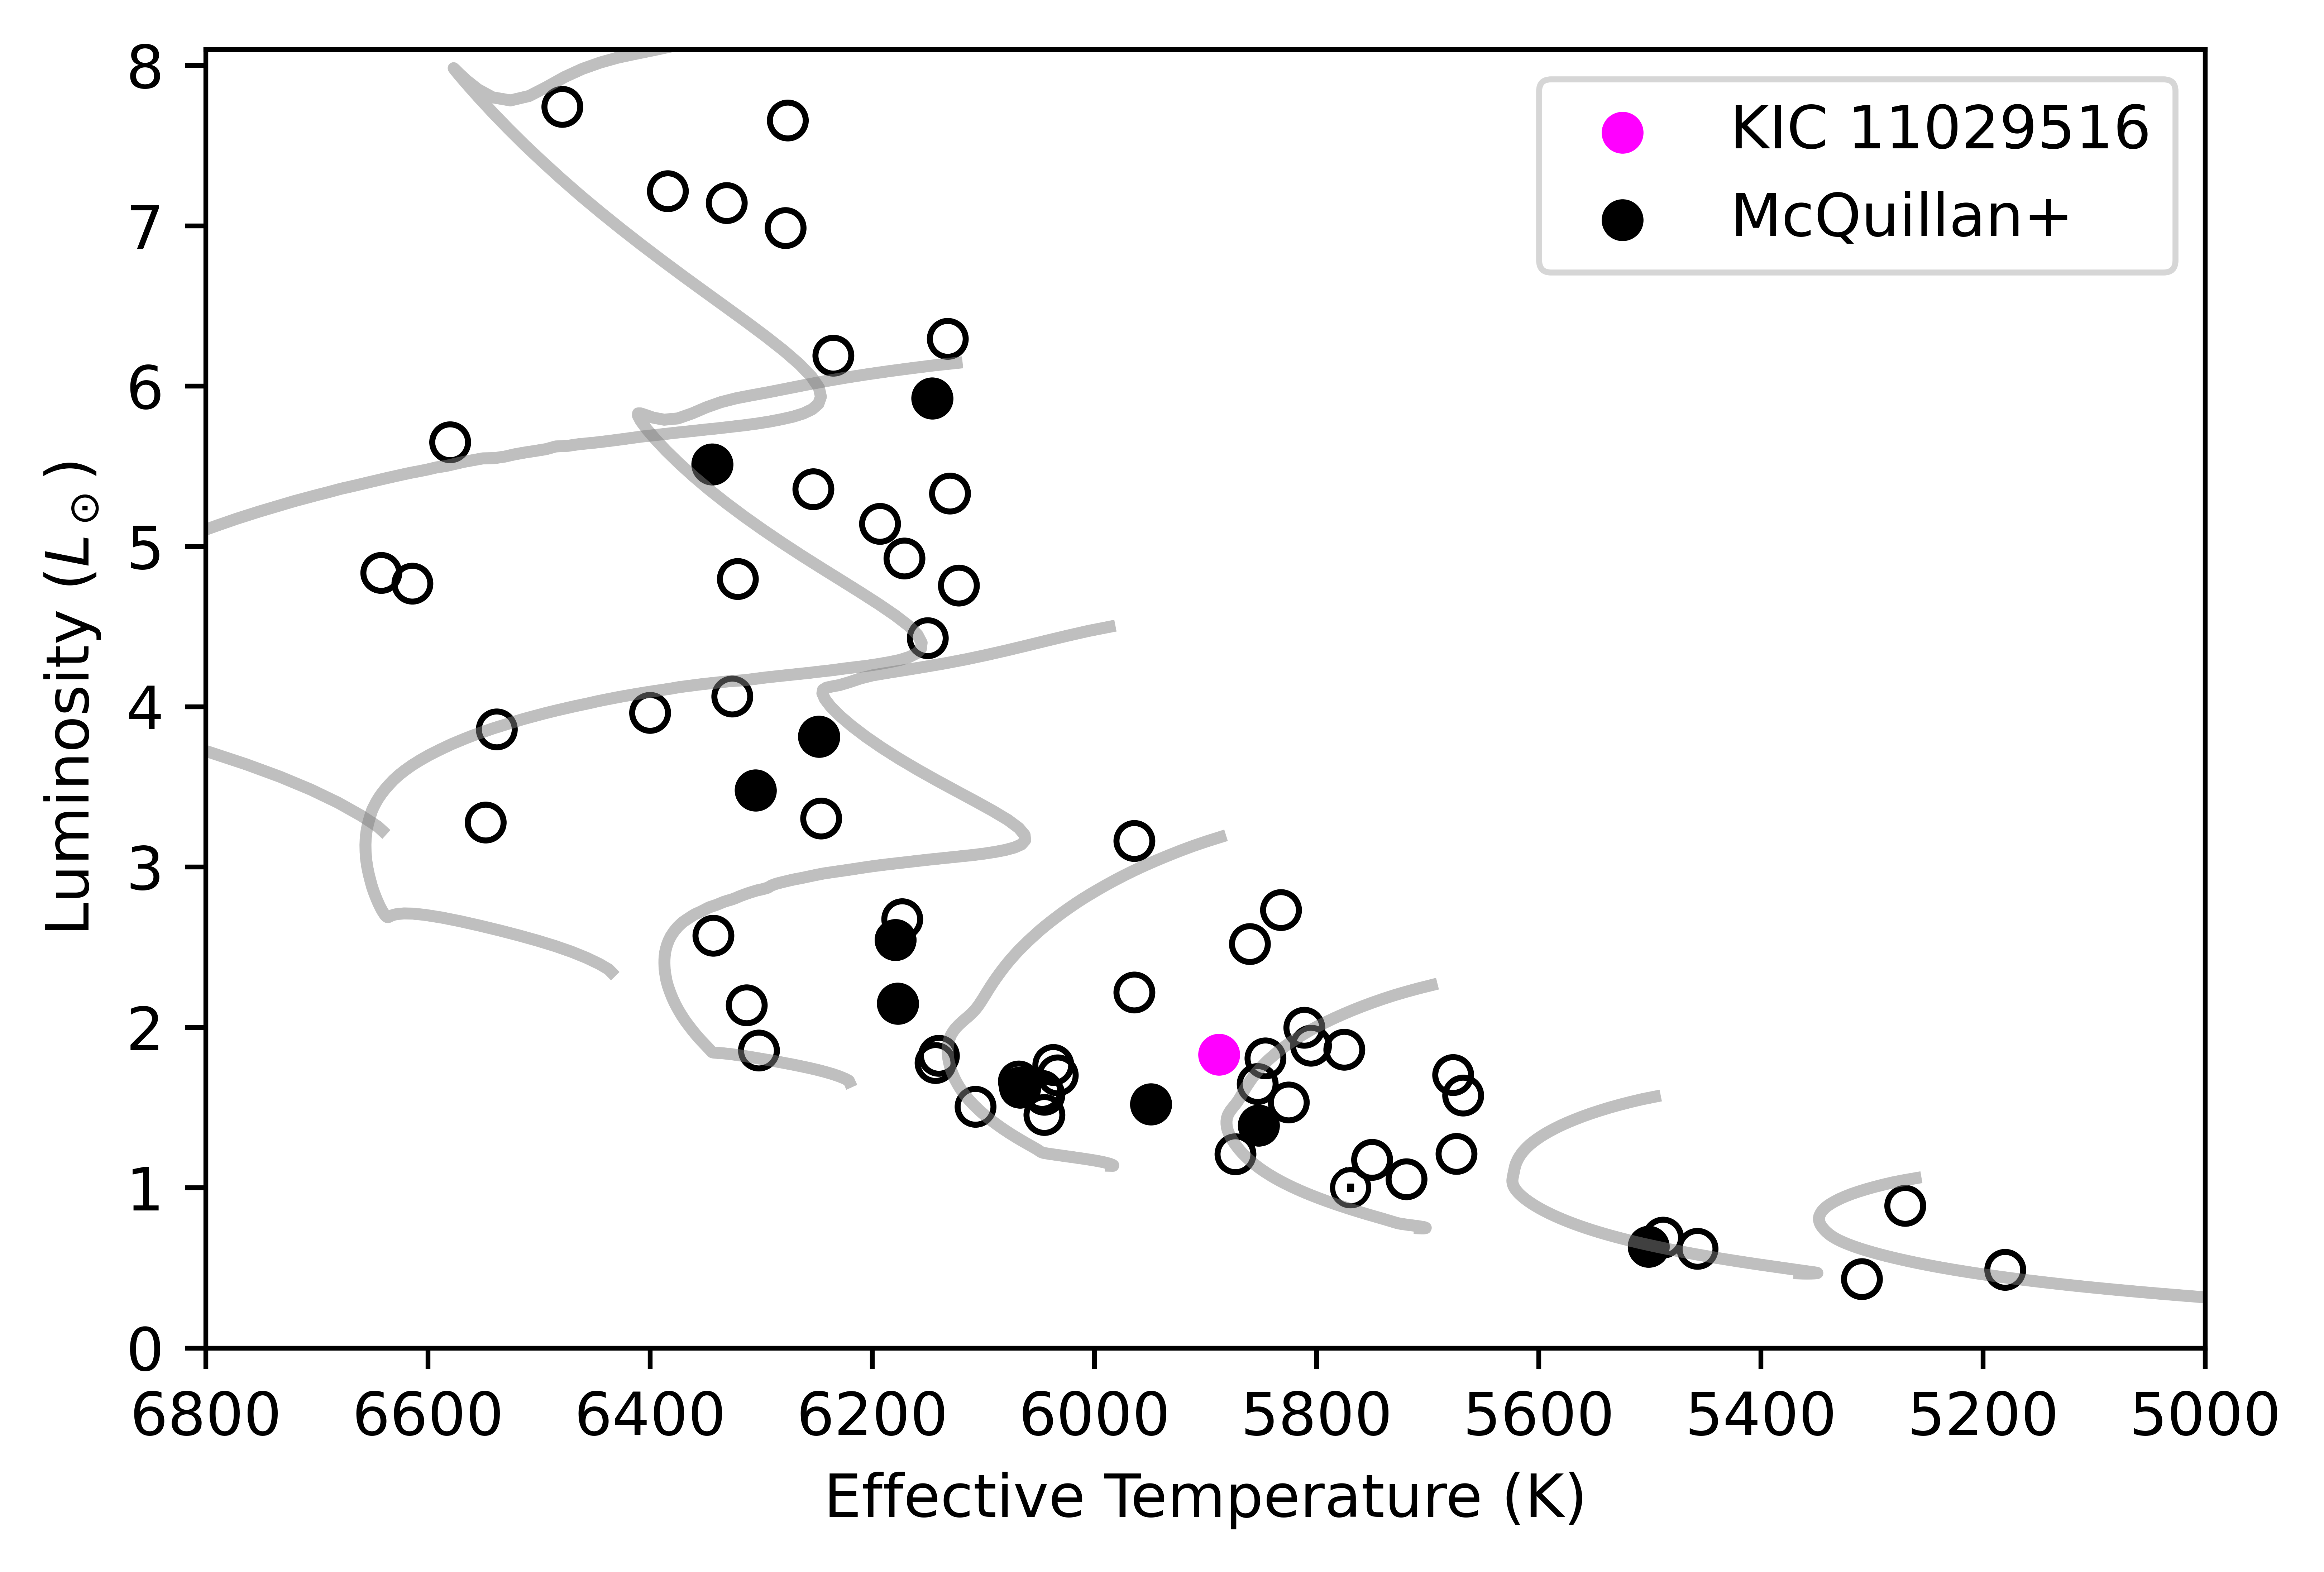

In [161]:
plot_HRnew(eep08,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep09,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep10,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep11,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep12,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep13,alpha=0, phases=[0], phasecolor=['Gray'])
plot_HRnew(eep14,alpha=0, phases=[0], phasecolor=['Gray'])

plt.scatter(ag_teff,ag_lum,facecolor='none',edgecolor='black')#dodgerblue')
plt.scatter(papayu_teff,papayu_lum,color='magenta',label='KIC 11029516')
plt.scatter(mcqag_teff,mcqag_lum,color='black',label='McQuillan+')
plt.scatter(sun_teff,sun_lum,marker='$\odot$',color='black',s=60,linewidths=0.1)


plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity ($L_\odot$)')
plt.xlim([6800,5000])
plt.ylim([0,8.1])
# plt.ylim([2.5,0.5])
#plt.ylim([180,40])

plt.legend(loc="upper right")

print(mcqag_lum)
print(mcqag_teff)